# A Data Science Study on Citi Bike
Cindy Zhang, Nadia Shin

## Citi Bike Background

With 12,000 bikes at 750 docking stations, New York City’s bike share system, Citi Bike, is the largest and most successful in the United States. Citi Bike consists of a fleet of specially designed bikes that are locked into a network of docks across the greater New York City area. Since its launch in 2013, Citi Bike has become an integral part of New York’s public transportation network, “making getting around easier, greener, and healthier all at once.”

## Motivation

Recently, Lyft announced its plan to invest more than $100 million in Citi Bike during the next five years, as per its acquisition agreement with Motivate International, Citi Bike’s parent company. 

According to an article in Wall Street Journal, Lyft’s investment is expected to more than triple the number of bikes available in New York City and almost double Citi Bike’s service area. The article highlighted some facts about Citi Bike’s current operation and shared Lyft’s outlook for Citi Bike in the next five years. Some of the key arguments include:

- As Citi Bike system currently covers Manhattan, Queens, the western edges of Brooklyn, and Jersey City, Lyft will expand Citi Bike’s docked system by 35 square miles.

- Lyft will add 12 new valet stations and increase bike and dock availability in the busiest areas to improve system performance.

- Lyft will add roughly 28,000 bikes to triple the number of bikes in the bike share system, majority of which will be pedal-assist e-bikes that can reach speeds of 15 miles per hour.

Based on the above statements, we decided to utilize Citi Bike System Data on its website (www.citibikenyc.com/system-data) to see if Lyft are making correct arguments, as well as potentially suggesting areas to work on for improving Citi Bike. 

## Importing Citi Bike Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import matplotlib.patches as mpatches
import statsmodels.formula.api as smf
import folium
import geopy
%matplotlib inline

In [2]:
#import the October citibike data in Manhattan 
cb = pd.read_csv('/Users/yanzhang/Downloads/201810-citibike-tripdata.csv')

In [3]:
#import the October citibike data in Jersey City
cb_jc = pd.read_csv('/Users/yanzhang/Downloads/JC-201810-citibike-tripdata.csv')

In [4]:
#appending the two into one dataframe
cb = cb.append(cb_jc)

In [5]:
cb

tripduration                 starttime                  stoptime  \
0               330  2018-10-01 00:00:00.7010  2018-10-01 00:05:30.8490   
1               309  2018-10-01 00:00:13.5780  2018-10-01 00:05:23.2310   
2               734  2018-10-01 00:00:16.6040  2018-10-01 00:12:31.5050   
3               788  2018-10-01 00:00:35.0670  2018-10-01 00:13:43.5780   
4              1136  2018-10-01 00:00:38.1410  2018-10-01 00:19:34.6490   
5               623  2018-10-01 00:00:39.0770  2018-10-01 00:11:02.7910   
6               498  2018-10-01 00:00:45.6350  2018-10-01 00:09:04.4050   
7               103  2018-10-01 00:00:49.1740  2018-10-01 00:02:32.5410   
8               484  2018-10-01 00:00:55.9960  2018-10-01 00:09:00.5120   
9               252  2018-10-01 00:01:01.8550  2018-10-01 00:05:14.6200   
10              583  2018-10-01 00:01:03.0260  2018-10-01 00:10:46.1460   
11             1099  2018-10-01 00:01:06.8940  2018-10-01 00:19:26.7230   
12              389  2018-10-01 00:01:10.0780  2018-10-01 00:07:39.8720   
13              164  2018-10-01 00:01:09.2910  2018-10-01 00:03:54.2170   
14              405  2018-10-01 00:01:09.1020  2018-10-01 00:07:55.0120   
15              423  2018-10-01 00:01:17.3880  2018-10-01 00:08:20.6440   
16              511  2018-10-01 00:01:29.3460  2018-10-01 00:10:00.5280   
17              660  2018-10-01 00:01:31.8640  2018-10-01 00:12:32.6330   
18              235  2018-10-01 00:01:49.9670  2018-10-01 00:05:45.7250   
19             1312  2018-10-01 00:01:53.8260  2018-10-01 00:23:46.4980   
20             1497  2018-10-01 00:01:58.5940  2018-10-01 00:26:55.9130   
21             1457  2018-10-01 00:01:11.4200  2018-10-01 00:25:28.9670   
22             1193  2018-10-01 00:02:07.9680  2018-10-01 00:22:01.1100   
23             1002  2018-10-01 00:02:08.7720  2018-10-01 00:18:51.1000   
24              192  2018-10-01 00:02:33.1830  2018-10-01 00:05:45.2330   
25              887  2018-10-01 00:02:38.0240  2018-10-01 00:17:25.5450   
26              326  2018-10-01 00:02:47.9800  2018-10-01 00:08:14.1410   
27              460  2018-10-01 00:03:10.0700  2018-10-01 00:10:51.0010   
28             1374  2018-10-01 00:03:13.8730  2018-10-01 00:26:07.9860   
29              148  2018-10-01 00:03:16.2260  2018-10-01 00:05:44.7710   
...             ...                       ...                       ...   
39108           440  2018-10-21 14:00:53.0970  2018-10-21 14:08:13.5500   
39109           980  2018-10-22 06:33:27.2520  2018-10-22 06:49:48.2080   
39110          1511  2018-10-22 17:27:41.3720  2018-10-22 17:52:52.8290   
39111          1015  2018-10-23 06:19:28.5620  2018-10-23 06:36:24.5310   
39112           680  2018-10-23 09:35:42.1580  2018-10-23 09:47:02.3270   
39113          1045  2018-10-23 10:26:24.8310  2018-10-23 10:43:50.2360   
39114           999  2018-10-23 10:57:37.0740  2018-10-23 11:14:16.8720   
39115           426  2018-10-23 16:36:36.8930  2018-10-23 16:43:43.8620   
39116          1048  2018-10-24 06:22:26.0720  2018-10-24 06:39:54.8610   
39117          1038  2018-10-25 06:22:36.9440  2018-10-25 06:39:55.3590   
39118           341  2018-10-25 10:34:02.6640  2018-10-25 10:39:44.2800   
39119          1445  2018-10-25 11:00:35.0440  2018-10-25 11:24:40.4980   
39120          1449  2018-10-25 11:00:45.0590  2018-10-25 11:24:54.5840   
39121          1317  2018-10-25 11:02:53.8090  2018-10-25 11:24:51.0700   
39122           382  2018-10-25 16:40:04.9020  2018-10-25 16:46:27.5070   
39123          1016  2018-10-26 06:25:31.6990  2018-10-26 06:42:27.8540   
39124          1692  2018-10-28 12:55:22.9620  2018-10-28 13:23:35.4700   
39125          1007  2018-10-29 06:25:55.7400  2018-10-29 06:42:43.2370   
39126           637  2018-10-29 09:19:16.2580  2018-10-29 09:29:53.6890   
39127           715  2018-10-29 11:17:36.0260  2018-10-29 11:29:31.0450   
39128           481  2018-10-29 16:32:41.5250  2018-10-29 16:40:43.0730   
39129           379  2018-10-29 

In [6]:
cb

tripduration                 starttime                  stoptime  \
0               330  2018-10-01 00:00:00.7010  2018-10-01 00:05:30.8490   
1               309  2018-10-01 00:00:13.5780  2018-10-01 00:05:23.2310   
2               734  2018-10-01 00:00:16.6040  2018-10-01 00:12:31.5050   
3               788  2018-10-01 00:00:35.0670  2018-10-01 00:13:43.5780   
4              1136  2018-10-01 00:00:38.1410  2018-10-01 00:19:34.6490   
5               623  2018-10-01 00:00:39.0770  2018-10-01 00:11:02.7910   
6               498  2018-10-01 00:00:45.6350  2018-10-01 00:09:04.4050   
7               103  2018-10-01 00:00:49.1740  2018-10-01 00:02:32.5410   
8               484  2018-10-01 00:00:55.9960  2018-10-01 00:09:00.5120   
9               252  2018-10-01 00:01:01.8550  2018-10-01 00:05:14.6200   
10              583  2018-10-01 00:01:03.0260  2018-10-01 00:10:46.1460   
11             1099  2018-10-01 00:01:06.8940  2018-10-01 00:19:26.7230   
12              389  2018-10-01 00:01:10.0780  2018-10-01 00:07:39.8720   
13              164  2018-10-01 00:01:09.2910  2018-10-01 00:03:54.2170   
14              405  2018-10-01 00:01:09.1020  2018-10-01 00:07:55.0120   
15              423  2018-10-01 00:01:17.3880  2018-10-01 00:08:20.6440   
16              511  2018-10-01 00:01:29.3460  2018-10-01 00:10:00.5280   
17              660  2018-10-01 00:01:31.8640  2018-10-01 00:12:32.6330   
18              235  2018-10-01 00:01:49.9670  2018-10-01 00:05:45.7250   
19             1312  2018-10-01 00:01:53.8260  2018-10-01 00:23:46.4980   
20             1497  2018-10-01 00:01:58.5940  2018-10-01 00:26:55.9130   
21             1457  2018-10-01 00:01:11.4200  2018-10-01 00:25:28.9670   
22             1193  2018-10-01 00:02:07.9680  2018-10-01 00:22:01.1100   
23             1002  2018-10-01 00:02:08.7720  2018-10-01 00:18:51.1000   
24              192  2018-10-01 00:02:33.1830  2018-10-01 00:05:45.2330   
25              887  2018-10-01 00:02:38.0240  2018-10-01 00:17:25.5450   
26              326  2018-10-01 00:02:47.9800  2018-10-01 00:08:14.1410   
27              460  2018-10-01 00:03:10.0700  2018-10-01 00:10:51.0010   
28             1374  2018-10-01 00:03:13.8730  2018-10-01 00:26:07.9860   
29              148  2018-10-01 00:03:16.2260  2018-10-01 00:05:44.7710   
...             ...                       ...                       ...   
39108           440  2018-10-21 14:00:53.0970  2018-10-21 14:08:13.5500   
39109           980  2018-10-22 06:33:27.2520  2018-10-22 06:49:48.2080   
39110          1511  2018-10-22 17:27:41.3720  2018-10-22 17:52:52.8290   
39111          1015  2018-10-23 06:19:28.5620  2018-10-23 06:36:24.5310   
39112           680  2018-10-23 09:35:42.1580  2018-10-23 09:47:02.3270   
39113          1045  2018-10-23 10:26:24.8310  2018-10-23 10:43:50.2360   
39114           999  2018-10-23 10:57:37.0740  2018-10-23 11:14:16.8720   
39115           426  2018-10-23 16:36:36.8930  2018-10-23 16:43:43.8620   
39116          1048  2018-10-24 06:22:26.0720  2018-10-24 06:39:54.8610   
39117          1038  2018-10-25 06:22:36.9440  2018-10-25 06:39:55.3590   
39118           341  2018-10-25 10:34:02.6640  2018-10-25 10:39:44.2800   
39119          1445  2018-10-25 11:00:35.0440  2018-10-25 11:24:40.4980   
39120          1449  2018-10-25 11:00:45.0590  2018-10-25 11:24:54.5840   
39121          1317  2018-10-25 11:02:53.8090  2018-10-25 11:24:51.0700   
39122           382  2018-10-25 16:40:04.9020  2018-10-25 16:46:27.5070   
39123          1016  2018-10-26 06:25:31.6990  2018-10-26 06:42:27.8540   
39124          1692  2018-10-28 12:55:22.9620  2018-10-28 13:23:35.4700   
39125          1007  2018-10-29 06:25:55.7400  2018-10-29 06:42:43.2370   
39126           637  2018-10-29 09:19:16.2580  2018-10-29 09:29:53.6890   
39127           715  2018-10-29 11:17:36.0260  2018-10-29 11:29:31.0450   
39128           481  2018-10-29 16:32:41.5250  2018-10-29 16:40:43.0730   
39129           379  2018-10-29 

In [7]:
cb.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [8]:
cb.columns = cb.columns.str.replace(' ', '_') # eliminating the space in the column names

In [9]:
cb.columns

Index(['tripduration', 'starttime', 'stoptime', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bikeid', 'usertype',
       'birth_year', 'gender'],
      dtype='object')

In [10]:
cb['starttime']= pd.to_datetime(cb['starttime']) # changing the data type to datetime
cb['stoptime']= pd.to_datetime(cb['stoptime'])

In [11]:
cb.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
usertype                           object
birth_year                          int64
gender                              int64
dtype: object

### Finding the Busiest Time of the Day

In [12]:
# categorizing the time of day
cb['timeofday'] = cb['starttime'].dt.hour
cb['timeofday'] = cb['timeofday'].replace(to_replace=[range(-1, 6)], value = 'Night')
cb['timeofday'] = cb['timeofday'].replace(to_replace=[range(6, 9)], value = 'Morning')
cb['timeofday'] = cb['timeofday'].replace(to_replace=[range(9, 13)], value = 'Beforenoon')
cb['timeofday'] = cb['timeofday'].replace(to_replace=[range(13, 17)], value = 'Afternoon')
cb['timeofday'] = cb['timeofday'].replace(to_replace=[range(17, 21)], value = 'Evening')

cb['timeofday'] = cb['timeofday'].replace(to_replace=[range(21, 26)], value = 'Night')

In [13]:
cb['timeofday'].nunique() #checking if all the values were assigned to one of the categories

5

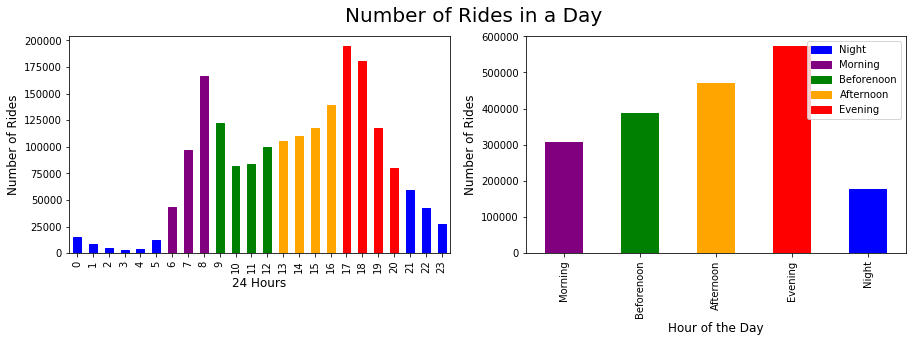

In [14]:
hour_order = ['Morning', 'Beforenoon', 'Afternoon', 'Evening', 'Night']

fig, ax  = plt.subplots(ncols=2, nrows=1)
cb['starttime'].dt.hour.value_counts(sort=False).plot(ax=ax[0], kind='bar', figsize=(15,4))
cb['timeofday'].value_counts(sort=False).loc[hour_order].plot(ax=ax[1], kind='bar',
                                                              color=('purple','green', 'orange', 'red', 'blue'))
# color based on category
for i in range(6):
    ax[0].get_children()[i].set_color('blue')
for i in range(6, 9):
    ax[0].get_children()[i].set_color('purple')
for i in range(9, 13):
    ax[0].get_children()[i].set_color('green')
for i in range(13, 17):
    ax[0].get_children()[i].set_color('orange')
for i in range(17, 21):
    ax[0].get_children()[i].set_color('red')
for i in range(21, 24):
    ax[0].get_children()[i].set_color('blue')

# title and labels
fig.suptitle('Number of Rides in a Day', fontsize=20)
ax[0].set_ylabel('Number of Rides', fontsize=12)
ax[0].set_xlabel('24 Hours', fontsize=12)
ax[1].set_ylabel('Number of Rides', fontsize=12)
ax[1].set_xlabel('Hour of the Day', fontsize=12)

# legend
red_patch = mpatches.Patch(color='red', label='Evening')
blue_patch = mpatches.Patch(color='blue', label='Night')
purple_patch = mpatches.Patch(color='purple', label='Morning')
green_patch = mpatches.Patch(color='green', label='Beforenoon')
orange_patch = mpatches.Patch(color='orange', label='Afternoon')
plt.legend(handles=[blue_patch, purple_patch, green_patch, orange_patch, red_patch])

In [15]:
cb['starttime'].dt.hour.value_counts().describe()

count        24.000000
mean      79908.125000
std       58287.378079
min        3073.000000
25%       24730.000000
50%       82928.000000
75%      117341.500000
max      194610.000000
Name: starttime, dtype: float64

In [16]:
cb['starttime'].dt.hour.value_counts()

17    194610
18    180758
8     166568
16    139141
9     122028
19    117784
15    117194
14    109676
13    105273
12    100113
7      97319
11     83826
10     82030
20     79843
21     59056
6      43810
22     42410
23     27821
0      15457
5      12672
1       8732
2       4968
4       3633
3       3073
Name: starttime, dtype: int64

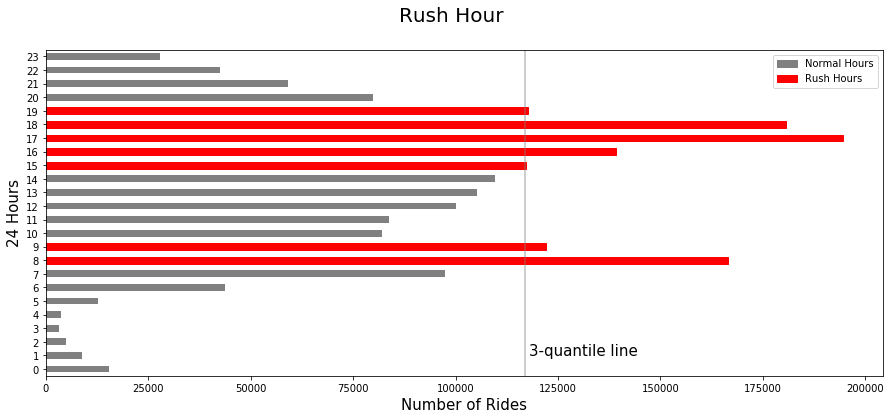

In [17]:
fig, ax  = plt.subplots()
cb['starttime'].dt.hour.value_counts(sort=False).plot(ax=ax, kind='barh', color='grey', figsize=(15, 6))

# coloring rush hour in red
for i in range(8, 10):
     ax.get_children()[i].set_color('red') 
for i in range(15, 20):
    ax.get_children()[i].set_color('red')

# the 3-quantile line
ax.axvline(117000, color='grey', alpha=0.5)
ax.text(118000, 1, '3-quantile line', size = 15) # Rounded the 3-quantile to the thousands

# title and labels
fig.suptitle('Rush Hour', fontsize=20)
ax.set_ylabel('24 Hours', fontsize=15)
ax.set_xlabel('Number of Rides', fontsize=15)

# legend
red_patch = mpatches.Patch(color='red', label='Rush Hours')
black_patch = mpatches.Patch(color='grey', label='Normal Hours')
plt.legend(handles=[black_patch, red_patch])

## Trips per Days of the Week

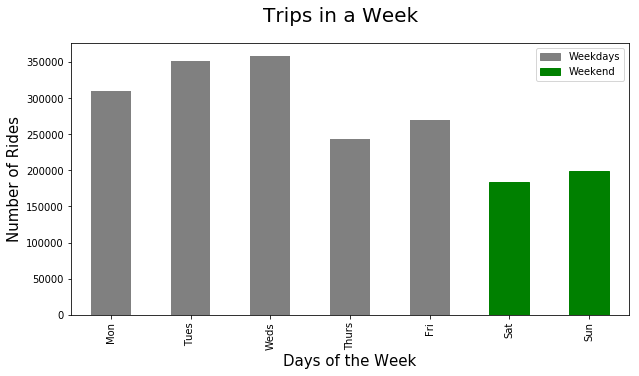

In [18]:
fig, ax  = plt.subplots()
cb['starttime'].dt.dayofweek.value_counts(sort=False).plot(ax=ax,kind='bar', color ='grey', figsize=(10, 5))

# coloring rush hour in blue
ax.get_children()[5].set_color('green')
ax.get_children()[6].set_color('green')

# title and labels
fig.suptitle('Trips in a Week', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=15)
ax.set_xlabel('Days of the Week', fontsize=15)
ax.set_xticklabels(['Mon','Tues','Weds','Thurs','Fri','Sat','Sun'])

# legend
blue_patch = mpatches.Patch(color='green', label='Weekend')
black_patch = mpatches.Patch(color='grey', label='Weekdays')
plt.legend(handles=[black_patch, blue_patch])

### Busiest Day of the Month

In [19]:
cb['starttime'].dt.day.value_counts().describe()

count       31.000000
mean     61864.354839
std      13143.430809
min      13206.000000
25%      58287.500000
50%      62124.000000
75%      68764.000000
max      78474.000000
Name: starttime, dtype: float64

In [20]:
trips_day = (cb['starttime'].dt.day.value_counts()>cb['starttime'].dt.day.value_counts().quantile(0.25)).to_dict()
trips_day

{3: True,
 10: True,
 5: True,
 9: True,
 2: True,
 1: True,
 4: True,
 31: True,
 23: True,
 12: True,
 17: True,
 16: True,
 30: True,
 19: True,
 24: True,
 18: True,
 25: True,
 7: True,
 29: True,
 26: True,
 15: True,
 8: True,
 22: True,
 6: False,
 20: False,
 13: False,
 14: False,
 11: False,
 28: False,
 21: False,
 27: False}

In [21]:
unpopular_days = []
for key in trips_day.keys():
    if trips_day[key] == False:
        unpopular_days.append(key)
unpopular_days

[6, 20, 13, 14, 11, 28, 21, 27]

In [22]:
unpopular_days = [i - 1 for i in unpopular_days] # subtracting 1 to use them as index for coloring the graph

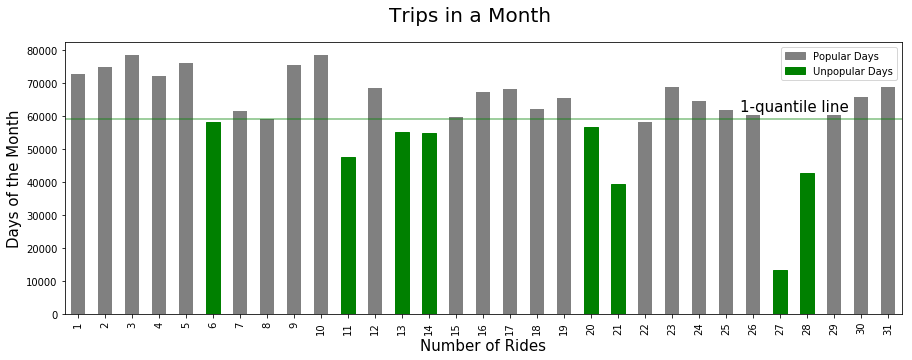

In [23]:
fig, ax  = plt.subplots()
cb['starttime'].dt.day.value_counts(sort=False).plot(ax=ax, kind='bar', color = 'grey', figsize=(15, 5))

# coloring the below 1-quantile in red
for i in unpopular_days:
    ax.get_children()[i].set_color('green') 

# the average line
ax.axhline(59000, color='green', alpha=0.5)
ax.text(24.5, 61500, '1-quantile line', size = 15)

# title and labels
fig.suptitle('Trips in a Month', fontsize=20)
ax.set_ylabel('Days of the Month', fontsize=15)
ax.set_xlabel('Number of Rides', fontsize=15)

# legend
green_patch = mpatches.Patch(color='green', label='Unpopular Days')
black_patch = mpatches.Patch(color='grey', label='Popular Days')
plt.legend(handles=[black_patch, green_patch])

## User Types

In [24]:
cb.groupby('usertype').describe()

bikeid                                                        \
                count          mean          std      min      25%      50%   
usertype                                                                      
Customer     194405.0  26499.013647  6852.788518  14529.0  19454.0  28483.0   
Subscriber  1723390.0  27707.409581  6561.770756  14529.0  20989.0  30133.0   

                             birth_year                 ...      \
                75%      max      count         mean    ...       
usertype                                                ...       
Customer    32742.0  35441.0   194405.0  1977.879967    ...       
Subscriber  33324.0  35443.0  1723390.0  1979.948528    ...       

           start_station_longitude         tripduration               \
                               75%     max        count         mean   
usertype                                                               
Customer                -73.970325 -73.878     194405.0  2016.170762   
Subscriber              -73.973715 -73.878    1723390.0   767.211422   

                                                                  
                     std   min    25%     50%     75%        max  
usertype                                                          
Customer    20867.916645  61.0  750.0  1223.0  1701.0  2500911.0  
Subscriber   5475.490520  61.0  335.0   552.0   928.0  1839944.0  

[2 rows x 80 columns]

In [25]:
cb.columns

Index(['tripduration', 'starttime', 'stoptime', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bikeid', 'usertype',
       'birth_year', 'gender', 'timeofday'],
      dtype='object')

In [26]:
cb.groupby('usertype').start_station_name.value_counts()

usertype    start_station_name                           
Customer    Central Park S & 6 Ave                           4145
            Grand Army Plaza & Central Park S                3689
            Centre St & Chambers St                          2593
            5 Ave & E 88 St                                  2540
            12 Ave & W 40 St                                 2216
            Central Park West & W 72 St                      2025
            5 Ave & E 73 St                                  1944
            5 Ave & E 78 St                                  1727
            Old Fulton St                                    1584
            Pier 40 - Hudson River Park                      1551
            West St & Chambers St                            1509
            Broadway & W 60 St                               1491
            Central Park North & Adam Clayton Powell Blvd    1485
            Central Park West & W 76 St                      1444
            South 

In [27]:
#saving popular stations among customers for mapping purposes later
customer_station_list=['Central Park S & 6 Ave', 'Grand Army Plaza & Central Park S',
                       'Centre St & Chambers St','5 Ave & E 88 St','12 Ave & W 40 St',
                       'Central Park West & W 72 St','5 Ave & E 73 St','5 Ave & E 78 St',
                       'Old Fulton St','Pier 40 - Hudson River Park']

In [28]:
#saving popular stations among subscribers for mapping purposes later
subscriber_station_list = ['Lafayette Park', 'Carroll St & Washington Ave',
                           '21 St & Hoyt Ave S','Carroll St & Franklin Ave',
                           'Crown St & Bedford Ave','34 Ave & 13 St',
                           '40 Ave & 9 St','Montgomery St & Franklin Ave',
                           'Railroad Ave & Kay Ave','NYCBS Depot - GOW']

In [29]:
# Counting the trip duration by user type
usertype_tripduration = cb.groupby('usertype').tripduration.mean().to_frame()
usertype_tripduration

tripduration
usertype                
Customer     2016.170762
Subscriber    767.211422

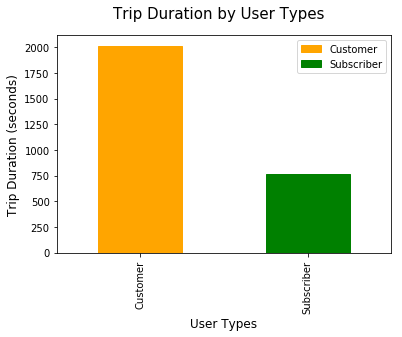

In [30]:
fig, ax  = plt.subplots()
usertype_tripduration.plot(ax = ax, kind='bar', legend = False)
ax.get_children()[0].set_color('orange')
ax.get_children()[1].set_color('green')

# title and labels
fig.suptitle('Trip Duration by User Types', fontsize=15)
ax.set_ylabel('Trip Duration (seconds)', fontsize=12)
ax.set_xlabel('User Types', fontsize=12)

# legend
green_patch = mpatches.Patch(color='green', label='Subscriber')
orange_patch = mpatches.Patch(color='orange', label='Customer')
plt.legend(handles=[orange_patch, green_patch])

In [31]:
# Eliminating undeclared data and Counting customers by gender and usertype
gendercb = cb[cb.gender != 0]
gender_per = gendercb.groupby('usertype').gender.value_counts(normalize=True, sort=False)*100
gender_per.to_frame()

gender
usertype   gender           
Customer   1       65.052609
           2       34.947391
Subscriber 1       75.017835
           2       24.982165

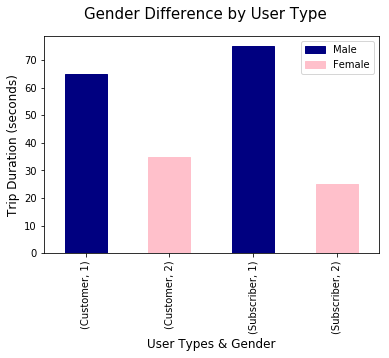

In [32]:
fig, ax  = plt.subplots()
gender_per.plot(kind='bar')
ax.get_children()[0].set_color('Navy')
ax.get_children()[1].set_color('Pink')
ax.get_children()[2].set_color('Navy')
ax.get_children()[3].set_color('Pink')

# title and labels
fig.suptitle('Gender Difference by User Type', fontsize=15)
ax.set_ylabel('Trip Duration (seconds)', fontsize=12)
ax.set_xlabel('User Types & Gender', fontsize=12)

# legend
navy_patch = mpatches.Patch(color='Navy', label='Male')
pink_patch = mpatches.Patch(color='pink', label='Female')
plt.legend(handles=[navy_patch, pink_patch])

In [34]:
# Eliminating irrational age
cb['age'] = 2018 - cb['birth_year']

In [35]:
age_upper_limit = cb['age'].mean() + 2*cb['age'].std()

In [36]:
birth_year_limit = 2018 - age_upper_limit

In [37]:
cb['age_range'] = cb['age']

In [38]:
# Categorizing customers by age range
cb['age_range'] = cb['age_range'].replace(to_replace=[range(20)], value = '10s')
cb['age_range'] = cb['age_range'].replace(to_replace=[range(20, 30)], value = '20s')
cb['age_range'] = cb['age_range'].replace(to_replace=[range(30, 40)], value = '30s')
cb['age_range'] = cb['age_range'].replace(to_replace=[range(40, 50)], value = '40s')
cb['age_range'] = cb['age_range'].replace(to_replace=[range(50, 60)], value = '50s')
cb['age_range'] = cb['age_range'].replace(to_replace=[range(60, 70)], value = '60s +')

In [39]:
cb_age = cb.loc[cb['birth_year'] >= birth_year_limit]

In [40]:
cb_age

tripduration               starttime                stoptime  \
0               330 2018-10-01 00:00:00.701 2018-10-01 00:05:30.849   
1               309 2018-10-01 00:00:13.578 2018-10-01 00:05:23.231   
2               734 2018-10-01 00:00:16.604 2018-10-01 00:12:31.505   
3               788 2018-10-01 00:00:35.067 2018-10-01 00:13:43.578   
4              1136 2018-10-01 00:00:38.141 2018-10-01 00:19:34.649   
5               623 2018-10-01 00:00:39.077 2018-10-01 00:11:02.791   
6               498 2018-10-01 00:00:45.635 2018-10-01 00:09:04.405   
7               103 2018-10-01 00:00:49.174 2018-10-01 00:02:32.541   
8               484 2018-10-01 00:00:55.996 2018-10-01 00:09:00.512   
9               252 2018-10-01 00:01:01.855 2018-10-01 00:05:14.620   
10              583 2018-10-01 00:01:03.026 2018-10-01 00:10:46.146   
11             1099 2018-10-01 00:01:06.894 2018-10-01 00:19:26.723   
12              389 2018-10-01 00:01:10.078 2018-10-01 00:07:39.872   
13              164 2018-10-01 00:01:09.291 2018-10-01 00:03:54.217   
14              405 2018-10-01 00:01:09.102 2018-10-01 00:07:55.012   
15              423 2018-10-01 00:01:17.388 2018-10-01 00:08:20.644   
16              511 2018-10-01 00:01:29.346 2018-10-01 00:10:00.528   
17              660 2018-10-01 00:01:31.864 2018-10-01 00:12:32.633   
18              235 2018-10-01 00:01:49.967 2018-10-01 00:05:45.725   
19             1312 2018-10-01 00:01:53.826 2018-10-01 00:23:46.498   
20             1497 2018-10-01 00:01:58.594 2018-10-01 00:26:55.913   
21             1457 2018-10-01 00:01:11.420 2018-10-01 00:25:28.967   
22             1193 2018-10-01 00:02:07.968 2018-10-01 00:22:01.110   
23             1002 2018-10-01 00:02:08.772 2018-10-01 00:18:51.100   
24              192 2018-10-01 00:02:33.183 2018-10-01 00:05:45.233   
25              887 2018-10-01 00:02:38.024 2018-10-01 00:17:25.545   
26              326 2018-10-01 00:02:47.980 2018-10-01 00:08:14.141   
27              460 2018-10-01 00:03:10.070 2018-10-01 00:10:51.001   
28             1374 2018-10-01 00:03:13.873 2018-10-01 00:26:07.986   
29              148 2018-10-01 00:03:16.226 2018-10-01 00:05:44.771   
...             ...                     ...                     ...   
39107           689 2018-10-20 21:17:08.921 2018-10-20 21:28:37.976   
39108           440 2018-10-21 14:00:53.097 2018-10-21 14:08:13.550   
39109           980 2018-10-22 06:33:27.252 2018-10-22 06:49:48.208   
39110          1511 2018-10-22 17:27:41.372 2018-10-22 17:52:52.829   
39111          1015 2018-10-23 06:19:28.562 2018-10-23 06:36:24.531   
39112           680 2018-10-23 09:35:42.158 2018-10-23 09:47:02.327   
39113          1045 2018-10-23 10:26:24.831 2018-10-23 10:43:50.236   
39114           999 2018-10-23 10:57:37.074 2018-10-23 11:14:16.872   
39115           426 2018-10-23 16:36:36.893 2018-10-23 16:43:43.862   
39116          1048 2018-10-24 06:22:26.072 2018-10-24 06:39:54.861   
39117          1038 2018-10-25 06:22:36.944 2018-10-25 06:39:55.359   
39118           341 2018-10-25 10:34:02.664 2018-10-25 10:39:44.280   
39119          1445 2018-10-25 11:00:35.044 2018-10-25 11:24:40.498   
39120          1449 2018-10-25 11:00:45.059 2018-10-25 11:24:54.584   
39122           382 2018-10-25 16:40:04.902 2018-10-25 16:46:27.507   
39123          1016 2018-10-26 06:25:31.699 2018-10-26 06:42:27.854   
39124          1692 2018-10-28 12:55:22.962 2018-10-28 13:23:35.470   
39125          1007 2018-10-29 06:25:55.740 2018-10-29 06:42:43.237   
39126           637 2018-10-29 09:19:16.258 2018-10-29 09:29:53.689   
39127           715 2018-10-29 11:17:36.026 2018-10-29 11:29:31.045   
39128           481 2018-10-29 16:32:41.525 2018-10-29 16:40:43.073   
39129           379 2018-10-29 18:07:37.481 2018-10-29 18:13:56.703   
39130          1006 2018-10-30 06:28:48.607 2018-10-30 06:45:35.395   
39131          1119 2018-10-30 10:35:45.564 2018-10-30 10:54:25.301   
39132           378 2018-10-30 

In [41]:
# Counting users by age range and user type
age_per = cb_age.groupby('usertype').age_range.value_counts(normalize=True, sort=False)*100
age_per.to_frame()

age_range
usertype   age_range           
Customer   10s         2.437550
           20s        23.242489
           30s        16.512103
           40s        53.800212
           50s         3.589677
           60s +       0.417969
Subscriber 10s         1.108952
           20s        28.892768
           30s        33.241300
           40s        20.859396
           50s        13.452912
           60s +       2.444671

In [42]:
age_per.index.levels

FrozenList([['Customer', 'Subscriber'], ['10s', '20s', '30s', '40s', '50s', '60s +']])

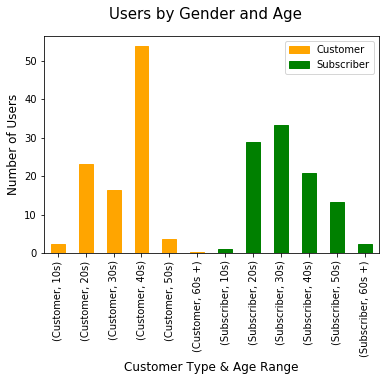

In [43]:
fig, ax  = plt.subplots()
age_per.plot(ax=ax, kind='bar')

# coloring customer in red and subsriber in green
for i in range(6):
    ax.get_children()[i].set_color('orange')
for i in range(6,12):
    ax.get_children()[i].set_color('green')

# title and labels
fig.suptitle('Users by Gender and Age', fontsize=15)
ax.set_ylabel('Number of Users', fontsize=12)
ax.set_xlabel('Customer Type & Age Range', fontsize=12)

# legend
green_patch = mpatches.Patch(color='green', label='Subscriber')
orange_patch = mpatches.Patch(color='orange', label='Customer')
plt.legend(handles=[orange_patch, green_patch])

### Precipitation

In [63]:
rain = pd.read_csv('/Users/yanzhang/Downloads/precipitation.csv')

In [64]:
rain

Day       Jan       Feb        Mar        Apr        May  \
0             1      0.02      0.07       0.05       0.15          0   
1             2         0         0       1.13          0       0.03   
2             3         0      0.01       1.59       0.13       0.02   
3             4         0         0          0       0.61       0.51   
4             5         0         0          0          0          0   
5             6         0         0          0       0.05       0.11   
6             7         0         0       0.39       0.06          0   
7             8      0.21      0.01       0.15          0          0   
8             9         0         0       0.23          0          0   
9            10      0.05      0.02       0.18          0       0.11   
10           11      0.01      0.13       0.01       0.03          0   
11           12      0.98      0.01          0       0.27       0.01   
12           13      0.08         0       0.64       0.01          0   
13           14         0         0        0.6          0          0   
14           15         0      0.09        1.1          0       0.46   
15           16      0.12      0.14          0       0.59          0   
16           17      0.02      0.01       0.03       0.04          0   
17           18         0      0.12       0.01       0.06          0   
18           19         0      0.72          0       0.04       0.49   
19           20         0      0.33          0          0       0.16   
20           21         0      0.03          0          0          0   
21           22      0.04      0.13          0          0       0.46   
22           23      0.15      0.31          0          0       0.03   
23           24      0.01      0.01          0          0       0.01   
24           25         0      0.49          0       0.36          0   
25           26         0         0          0       0.07          0   
26           27       0.2         0        0.2       0.02       0.19   
27           28         0      0.08       0.07       0.26          0   
28           29         0       NaN       0.61       0.51          0   
29           30         0       NaN       0.23       0.09          0   
30           31      0.01       NaN       0.01        NaN       0.02   
31    Rain Days        13        18         18         18         14   
32  Month Total  1.90  in  2.71  in   7.23  in   3.35  in   2.61  in   
33    YTD Total  1.90  in  4.61  in  11.84  in  15.19  in  17.80  in   

          Jun        Jul        Aug        Sep        Oct        Nov  \
0           0          0       0.15          0       0.01       0.29   
1           0       0.64       0.37       0.22       0.74       0.15   
2        0.22          0       0.07       0.19       0.01       0.47   
3        0.45          0       0.01       0.01       0.06       0.02   
4        0.05       0.12          0          0          0       0.22   
5        0.03          0       0.17          0       0.02       0.29   
6        0.01          0          0          0       0.12          0   
7           0          0       0.22          0          0          0   
8           0          0       0.07          0          0       0.83   
9           0          0          0        1.3          0       0.13   
10          0          0       0.03       0.25       1.13       0.15   
11          0          0          0          0       0.01          0   
12       0.16          0       0.21          0       0.35       0.34   
13          0          0       0.73          0          0       0.19   
14       0.03          0       0.06          0       0.29          0   
15          0       0.25          0          0          0       1.31   
16          0       0.66       0.85       0.12       0.27       0.17   
17       0.15          0       0.04       0.38       0.01       0.01   
18          0          0       0.01          0          0       0.03   
19          0          0          0          0     

In [65]:
rain = rain.drop([31,32,33]) # dropping unnecessary rows

In [66]:
rain.columns

Index(['Day', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')

In [67]:
# dropping unnecessary columns
rain = rain.drop(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Nov', 'Dec'], axis = 1)

In [68]:
rain

Day   Oct
0    1  0.01
1    2  0.74
2    3  0.01
3    4  0.06
4    5     0
5    6  0.02
6    7  0.12
7    8     0
8    9     0
9   10     0
10  11  1.13
11  12  0.01
12  13  0.35
13  14     0
14  15  0.29
15  16     0
16  17  0.27
17  18  0.01
18  19     0
19  20     0
20  21     0
21  22  0.05
22  23  0.22
23  24  0.24
24  25     0
25  26     0
26  27  1.08
27  28  0.23
28  29  0.17
29  30     0
30  31  0.14

In [69]:
rain.dtypes

Day    object
Oct    object
dtype: object

In [70]:
rain['Oct'] = rain['Oct'].astype(float)

In [71]:
rain

Day   Oct
0    1  0.01
1    2  0.74
2    3  0.01
3    4  0.06
4    5  0.00
5    6  0.02
6    7  0.12
7    8  0.00
8    9  0.00
9   10  0.00
10  11  1.13
11  12  0.01
12  13  0.35
13  14  0.00
14  15  0.29
15  16  0.00
16  17  0.27
17  18  0.01
18  19  0.00
19  20  0.00
20  21  0.00
21  22  0.05
22  23  0.22
23  24  0.24
24  25  0.00
25  26  0.00
26  27  1.08
27  28  0.23
28  29  0.17
29  30  0.00
30  31  0.14

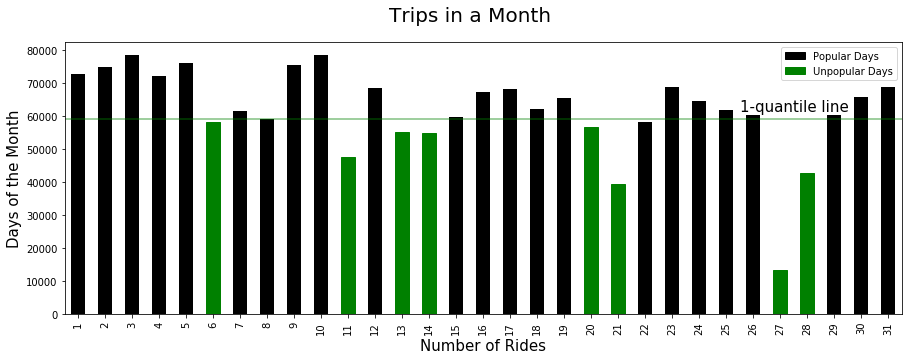

In [55]:
fig, ax  = plt.subplots()
cb['starttime'].dt.day.value_counts(sort=False).plot(ax=ax, kind='bar', color = 'black', figsize=(15, 5))

# coloring the below 1-quantile in red
for i in unpopular_days:
    ax.get_children()[i].set_color('green') 

# the average line
ax.axhline(59000, color='green', alpha=0.5)
ax.text(24.5, 61500, '1-quantile line', size = 15)

# title and labels
fig.suptitle('Trips in a Month', fontsize=20)
ax.set_ylabel('Days of the Month', fontsize=15)
ax.set_xlabel('Number of Rides', fontsize=15)

# legend
green_patch = mpatches.Patch(color='green', label='Unpopular Days')
black_patch = mpatches.Patch(color='black', label='Popular Days')
plt.legend(handles=[black_patch, green_patch])

Text(0.5,0,'Precipitation size')

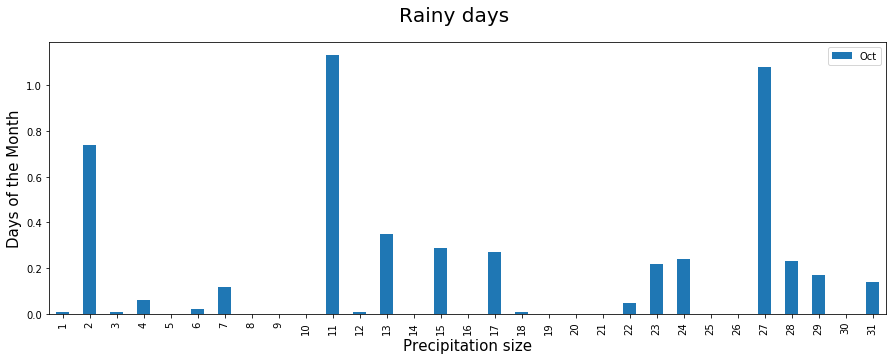

In [56]:
fig, ax  = plt.subplots()
rain.plot(ax=ax, kind='bar', figsize=(15, 5))

# title and labels
fig.suptitle('Rainy days', fontsize=20)
ax.set_ylabel('Days of the Month', fontsize=15)
ax.set_xlabel('Precipitation size', fontsize=15)

In [58]:
cb['Day'] = cb['starttime']

In [59]:
cb['Day'] = cb['Day'].dt.date

In [60]:
cb['Day']= pd.to_datetime(cb['Day'])

In [72]:
rain['Day'] = '2018-10-' + rain['Day'].astype(str)

In [73]:
rain['Day']= pd.to_datetime(rain['Day'])

In [74]:
rain.dtypes

Day    datetime64[ns]
Oct           float64
dtype: object

In [75]:
cb = cb.join(rain.set_index('Day'), on = 'Day')

In [76]:
cb

tripduration               starttime                stoptime  \
0               330 2018-10-01 00:00:00.701 2018-10-01 00:05:30.849   
1               309 2018-10-01 00:00:13.578 2018-10-01 00:05:23.231   
2               734 2018-10-01 00:00:16.604 2018-10-01 00:12:31.505   
3               788 2018-10-01 00:00:35.067 2018-10-01 00:13:43.578   
4              1136 2018-10-01 00:00:38.141 2018-10-01 00:19:34.649   
5               623 2018-10-01 00:00:39.077 2018-10-01 00:11:02.791   
6               498 2018-10-01 00:00:45.635 2018-10-01 00:09:04.405   
7               103 2018-10-01 00:00:49.174 2018-10-01 00:02:32.541   
8               484 2018-10-01 00:00:55.996 2018-10-01 00:09:00.512   
9               252 2018-10-01 00:01:01.855 2018-10-01 00:05:14.620   
10              583 2018-10-01 00:01:03.026 2018-10-01 00:10:46.146   
11             1099 2018-10-01 00:01:06.894 2018-10-01 00:19:26.723   
12              389 2018-10-01 00:01:10.078 2018-10-01 00:07:39.872   
13              164 2018-10-01 00:01:09.291 2018-10-01 00:03:54.217   
14              405 2018-10-01 00:01:09.102 2018-10-01 00:07:55.012   
15              423 2018-10-01 00:01:17.388 2018-10-01 00:08:20.644   
16              511 2018-10-01 00:01:29.346 2018-10-01 00:10:00.528   
17              660 2018-10-01 00:01:31.864 2018-10-01 00:12:32.633   
18              235 2018-10-01 00:01:49.967 2018-10-01 00:05:45.725   
19             1312 2018-10-01 00:01:53.826 2018-10-01 00:23:46.498   
20             1497 2018-10-01 00:01:58.594 2018-10-01 00:26:55.913   
21             1457 2018-10-01 00:01:11.420 2018-10-01 00:25:28.967   
22             1193 2018-10-01 00:02:07.968 2018-10-01 00:22:01.110   
23             1002 2018-10-01 00:02:08.772 2018-10-01 00:18:51.100   
24              192 2018-10-01 00:02:33.183 2018-10-01 00:05:45.233   
25              887 2018-10-01 00:02:38.024 2018-10-01 00:17:25.545   
26              326 2018-10-01 00:02:47.980 2018-10-01 00:08:14.141   
27              460 2018-10-01 00:03:10.070 2018-10-01 00:10:51.001   
28             1374 2018-10-01 00:03:13.873 2018-10-01 00:26:07.986   
29              148 2018-10-01 00:03:16.226 2018-10-01 00:05:44.771   
...             ...                     ...                     ...   
39108           440 2018-10-21 14:00:53.097 2018-10-21 14:08:13.550   
39109           980 2018-10-22 06:33:27.252 2018-10-22 06:49:48.208   
39110          1511 2018-10-22 17:27:41.372 2018-10-22 17:52:52.829   
39111          1015 2018-10-23 06:19:28.562 2018-10-23 06:36:24.531   
39112           680 2018-10-23 09:35:42.158 2018-10-23 09:47:02.327   
39113          1045 2018-10-23 10:26:24.831 2018-10-23 10:43:50.236   
39114           999 2018-10-23 10:57:37.074 2018-10-23 11:14:16.872   
39115           426 2018-10-23 16:36:36.893 2018-10-23 16:43:43.862   
39116          1048 2018-10-24 06:22:26.072 2018-10-24 06:39:54.861   
39117          1038 2018-10-25 06:22:36.944 2018-10-25 06:39:55.359   
39118           341 2018-10-25 10:34:02.664 2018-10-25 10:39:44.280   
39119          1445 2018-10-25 11:00:35.044 2018-10-25 11:24:40.498   
39120          1449 2018-10-25 11:00:45.059 2018-10-25 11:24:54.584   
39121          1317 2018-10-25 11:02:53.809 2018-10-25 11:24:51.070   
39122           382 2018-10-25 16:40:04.902 2018-10-25 16:46:27.507   
39123          1016 2018-10-26 06:25:31.699 2018-10-26 06:42:27.854   
39124          1692 2018-10-28 12:55:22.962 2018-10-28 13:23:35.470   
39125          1007 2018-10-29 06:25:55.740 2018-10-29 06:42:43.237   
39126           637 2018-10-29 09:19:16.258 2018-10-29 09:29:53.689   
39127           715 2018-10-29 11:17:36.026 2018-10-29 11:29:31.045   
39128           481 2018-10-29 16:32:41.525 2018-10-29 16:40:43.073   
39129           379 2018-10-29 18:07:37.481 2018-10-29 18:13:56.703   
39130          1006 2018-10-30 06:28:48.607 2018-10-30 06:45:35.395   
39131          1119 2018-10-30 10:35:45.564 2018-10-30 10:54:25.301   
39132           378 2018-10-30 

In [77]:
cb = cb.rename(columns = {'Oct': 'precipitation'})

In [78]:
rain = rain.set_index('Day')

In [79]:
rain.dtypes

Oct    float64
dtype: object

In [80]:
rain['Oct'] = rain['Oct'].astype(float)

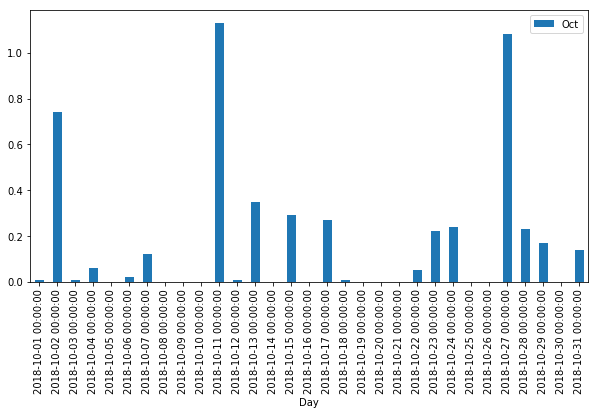

In [81]:
fig, ax  = plt.subplots()
rain.plot(ax=ax, kind='bar', figsize = (10,5))

In [82]:
print(smf.ols('tripduration ~ precipitation', data=cb).fit().summary())

                            OLS Regression Results                            
Dep. Variable:           tripduration   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.659
Date:                Tue, 18 Dec 2018   Prob (F-statistic):              0.103
Time:                        21:55:07   Log-Likelihood:            -2.0059e+07
No. Observations:             1917795   AIC:                         4.012e+07
Df Residuals:                 1917793   BIC:                         4.012e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       899.3126      6.964    129.137

# Mapping Citi Bike Stations

In [43]:
#dropping those with empty start stations or end stations
cb = cb.loc[cb['start_station_name'].notnull(),:]
cb = cb.loc[cb['end_station_name'].notnull(),:]

In [44]:
#only selecting columns related to start stations
cb_stations = cb.iloc[:,4:7]

In [45]:
#dropping duplicate start stations
cb_stations = cb_stations.drop_duplicates()

In [46]:
#only selecting columns related to end stations
cb_stations2 = cb.iloc[:,8:11]
#dropping duplicate end stations
cb_stations2 = cb_stations2.drop_duplicates()

In [47]:
cb_stations = cb_stations.set_index('start_station_name')

In [48]:
cb_stations.index.names = ['station_name']

In [49]:
cb_stations = cb_stations.rename(index=str, 
                                 columns={"start_station_latitude": "lat", "start_station_longitude": "lon"})

In [50]:
cb_stations2 = cb_stations2.set_index('end_station_name')
cb_stations2.index.names = ['station_name']
cb_stations2 = cb_stations2.rename(index=str, 
                                   columns={"end_station_latitude": "lat", "end_station_longitude": "lon"})

In [51]:
cb_stations = cb_stations.append(cb_stations2)

In [52]:
#getting lat and lon for each station
cb_stations.drop_duplicates()

lat        lon
station_name                                        
Lafayette St & E 8 St           40.730207 -73.991026
old - E 13 St & Avenue A        40.729554 -73.980572
W 15 St & 10 Ave                40.742754 -74.007474
Barclay St & Church St          40.712912 -74.010202
W 50 St & 9 Ave                 40.763605 -73.989180
Berry St & N 8 St               40.719009 -73.958525
Catherine St & Monroe St        40.711174 -73.996826
E 97 St & 3 Ave                 40.785920 -73.948603
Amsterdam Ave & W 66 St         40.774667 -73.984706
Forsyth St & Broome St          40.718939 -73.992663
Sterling Pl & 7 Ave             40.677165 -73.973828
Park Ave & E 124 St             40.804555 -73.939686
W 106 St & Amsterdam Ave        40.800836 -73.966449
Metropolitan Ave & Bedford Ave  40.715348 -73.960241
W 33 St & 7 Ave                 40.750200 -73.990931
Cliff St & Fulton St            40.708318 -74.005041
W 67 St & Broadway              40.774925 -73.982666
Leonard St & Maujer St          40.710369 -73.947060
5 Ave & E 63 St                 40.766368 -73.971518
8 Ave & W 52 St                 40.763707 -73.985162
Greenwich St & W Houston St     40.728846 -74.008591
8 Ave & W 33 St                 40.751551 -73.993934
E 118 St & 1 Ave                40.797470 -73.935040
South End Ave & Liberty St      40.711512 -74.015756
Graham Ave & Conselyea St       40.715143 -73.944507
W 82 St & Central Park West     40.782750 -73.971370
Carmine St & 6 Ave              40.730386 -74.002150
Schermerhorn St & Bond St       40.688417 -73.984517
E 71 St & 2 Ave                 40.768175 -73.959103
Broadway & W 41 St              40.755136 -73.986580
...                                   ...        ...
Van Vorst Park                  40.718489 -74.047727
Essex Light Rail                40.712774 -74.036486
5 Corners Library               40.734961 -74.059503
Baldwin at Montgomery           40.723659 -74.064194
Morris Canal                    40.712419 -74.038526
Lafayette Park                  40.713464 -74.062859
Brunswick & 6th                 40.726012 -74.050389
Jersey & 6th St                 40.725289 -74.045572
Jersey & 3rd                    40.723332 -74.045953
Manila & 1st                    40.721651 -74.042884
Columbus Drive                  40.718355 -74.038914
Marin Light Rail                40.714584 -74.042817
Communipaw & Berry Lane         40.714358 -74.066611
Monmouth and 6th                40.725685 -74.048790
Dixon Mills                     40.721630 -74.049968
Astor Place                     40.719282 -74.071262
Leonard Gordon Park             40.745910 -74.057271
JCBS Depot                      40.709651 -74.068601
York St                         40.716490 -74.041050
Montgomery St                   40.719420 -74.050990
Washington St                   40.724294 -74.035483
Harborside                      40.719252 -74.034234
Journal Square                  40.733670 -74.062500
Glenwood Ave                    40.727551 -74.071061
Fairmount Ave                   40.725726 -74.071959
Bergen Ave                      40.722104 -74.071455
Grand St                        40.715178 -74.037683
Jackson Square                  40.711130 -74.078900
NYCBS DEPOT - DELANCEY          40.716444 -73.982331
Handlebar @ Gowanus             40.669800 -73.994980

[818 rows x 2 columns]

In [53]:
station_dict = cb_stations.to_dict()

In [54]:
station_names = cb_stations.index.tolist()

In [55]:
#creating a dictionary for Citi Bike stations
directory = {}
for station in station_names:
    lat = station_dict['lat'][station]
    lon = station_dict['lon'][station]
    location = [lat, lon]
    directory.update({station: location})
directory

{'Lafayette St & E 8 St': [40.73020660529954, -73.99102628231049],
 'old - E 13 St & Avenue A': [40.72955361, -73.98057249],
 'W 15 St & 10 Ave': [40.742753828659026, -74.00747358798982],
 'Barclay St & Church St': [40.71291224, -74.01020234],
 'W 50 St & 9 Ave': [40.76360467795863, -73.98917958140373],
 'Berry St & N 8 St': [40.7190095, -73.95852515],
 'Catherine St & Monroe St': [40.71117444, -73.99682619],
 'E 97 St & 3 Ave': [40.7859201, -73.94860294],
 'Amsterdam Ave & W 66 St': [40.7746671, -73.98470567],
 'Forsyth St & Broome St': [40.71893904, -73.99266288],
 'Sterling Pl & 7 Ave': [40.67716489469059, -73.97382795810701],
 'Park Ave & E 124 St': [40.8045555, -73.93968609999999],
 'W 106 St & Amsterdam Ave': [40.80083629999999, -73.9664492472],
 'Metropolitan Ave & Bedford Ave': [40.71534825, -73.96024116],
 'W 33 St & 7 Ave': [40.75019995, -73.99093085],
 'Cliff St & Fulton St': [40.70831794366396, -74.0050408244133],
 'W 67 St & Broadway': [40.77492513, -73.98266566],
 'Leonar

In [56]:
#formatting for mapping
directory2 = {}
for station in station_names:
    lat = station_dict['lat'][station]
    lon = station_dict['lon'][station]
    location = (lat, lon)
    directory2.update({station: location})
directory2

{'Lafayette St & E 8 St': (40.73020660529954, -73.99102628231049),
 'old - E 13 St & Avenue A': (40.72955361, -73.98057249),
 'W 15 St & 10 Ave': (40.742753828659026, -74.00747358798982),
 'Barclay St & Church St': (40.71291224, -74.01020234),
 'W 50 St & 9 Ave': (40.76360467795863, -73.98917958140373),
 'Berry St & N 8 St': (40.7190095, -73.95852515),
 'Catherine St & Monroe St': (40.71117444, -73.99682619),
 'E 97 St & 3 Ave': (40.7859201, -73.94860294),
 'Amsterdam Ave & W 66 St': (40.7746671, -73.98470567),
 'Forsyth St & Broome St': (40.71893904, -73.99266288),
 'Sterling Pl & 7 Ave': (40.67716489469059, -73.97382795810701),
 'Park Ave & E 124 St': (40.8045555, -73.93968609999999),
 'W 106 St & Amsterdam Ave': (40.80083629999999, -73.9664492472),
 'Metropolitan Ave & Bedford Ave': (40.71534825, -73.96024116),
 'W 33 St & 7 Ave': (40.75019995, -73.99093085),
 'Cliff St & Fulton St': (40.70831794366396, -74.0050408244133),
 'W 67 St & Broadway': (40.77492513, -73.98266566),
 'Leonar

In [57]:
station_map = folium.Map(
    location= [40.730207,-73.991026],
    zoom_start=12,
    tiles='Stamen Terrain'
)

In [58]:
#empty map, featuring Manhattan area
station_map

In [59]:
#adding stations to map
for station in directory:
    location = directory[station]
    folium.CircleMarker(location,popup=station,color='green',radius=0.001).add_to(station_map)

In [60]:
station_map

In [61]:
#mapping popular stations among customers
for station in directory:
    location = directory[station]
    if station in customer_station_list:
        folium.CircleMarker(location,popup=station,color='red',radius=0.001).add_to(station_map)

In [62]:
station_map

In [63]:
#mapping popular stations among subscribers
for station in directory:
    location = directory[station]
    if station in subscriber_station_list:
        folium.CircleMarker(location,popup=station,color='blue',radius=0.01).add_to(station_map)

In [64]:
station_map

# Top 10 Stations for Departure and Destination

In [66]:
trips = cb[['starttime', 'start_station_name', 'end_station_name']]

In [67]:
trips

starttime              start_station_name  \
0     2018-10-01 00:00:00.701           Lafayette St & E 8 St   
1     2018-10-01 00:00:13.578        old - E 13 St & Avenue A   
2     2018-10-01 00:00:16.604                W 15 St & 10 Ave   
3     2018-10-01 00:00:35.067          Barclay St & Church St   
4     2018-10-01 00:00:38.141                 W 50 St & 9 Ave   
5     2018-10-01 00:00:39.077               Berry St & N 8 St   
6     2018-10-01 00:00:45.635        Catherine St & Monroe St   
7     2018-10-01 00:00:49.174                 E 97 St & 3 Ave   
8     2018-10-01 00:00:55.996        Catherine St & Monroe St   
9     2018-10-01 00:01:01.855         Amsterdam Ave & W 66 St   
10    2018-10-01 00:01:03.026          Forsyth St & Broome St   
11    2018-10-01 00:01:06.894             Sterling Pl & 7 Ave   
12    2018-10-01 00:01:10.078                W 15 St & 10 Ave   
13    2018-10-01 00:01:09.291             Park Ave & E 124 St   
14    2018-10-01 00:01:09.102        W 106 St & Amsterdam Ave   
15    2018-10-01 00:01:17.388  Metropolitan Ave & Bedford Ave   
16    2018-10-01 00:01:29.346                 W 33 St & 7 Ave   
17    2018-10-01 00:01:31.864                W 15 St & 10 Ave   
18    2018-10-01 00:01:49.967            Cliff St & Fulton St   
19    2018-10-01 00:01:53.826              W 67 St & Broadway   
20    2018-10-01 00:01:58.594          Leonard St & Maujer St   
21    2018-10-01 00:01:11.420                 5 Ave & E 63 St   
22    2018-10-01 00:02:07.968                 8 Ave & W 52 St   
23    2018-10-01 00:02:08.772             Sterling Pl & 7 Ave   
24    2018-10-01 00:02:33.183     Greenwich St & W Houston St   
25    2018-10-01 00:02:38.024                 8 Ave & W 33 St   
26    2018-10-01 00:02:47.980                E 118 St & 1 Ave   
27    2018-10-01 00:03:10.070                 8 Ave & W 33 St   
28    2018-10-01 00:03:13.873              W 67 St & Broadway   
29    2018-10-01 00:03:16.226      South End Ave & Liberty St   
...                       ...                             ...   
39108 2018-10-21 14:00:53.097                  Jackson Square   
39109 2018-10-22 06:33:27.252                  Jackson Square   
39110 2018-10-22 17:27:41.372                  Jackson Square   
39111 2018-10-23 06:19:28.562                  Jackson Square   
39112 2018-10-23 09:35:42.158                  Jackson Square   
39113 2018-10-23 10:26:24.831                  Jackson Square   
39114 2018-10-23 10:57:37.074                  Jackson Square   
39115 2018-10-23 16:36:36.893                  Jackson Square   
39116 2018-10-24 06:22:26.072                  Jackson Square   
39117 2018-10-25 06:22:36.944                  Jackson Square   
39118 2018-10-25 10:34:02.664                  Jackson Square   
39119 2018-10-25 11:00:35.044                  Jackson Square   
39120 2018-10-25 11:00:45.059                  Jackson Square   
39121 2018-10-25 11:02:53.809                  Jackson Square   
39122 2018-10-25 16:40:04.902                  Jackson Square   
39123 2018-10-26 06:25:31.699                  Jackson Square   
39124 2018-10-28 12:55:22.962                  Jackson Square   
39125 2018-10-29 06:25:55.740                  Jackson Square   
39126 2018-10-29 09:19:16.258                  Jackson Square   
39127 2018-10-29 11:17:36.026                  Jackson Square   
39128 2018-10-29 16:32:41.525                  Jackson Square   
39129 2018-10-29 18:07:37.481                  Jackson Square   
39130 2018-10-30 06:28:48.607                  Jackson Square   
39131 2018-10-30 10:35:45.564                  Jackson Square   
39132 2018-10-30 19:00:21.046                  Jackson Square   
39133 2018-10-31 11:30:53.707                  Jackson Square   
39134 2018-10-31 12:20:41.699                  Jackson Square   
39135 2018-10-31 12:21:36.279                  Jackson Square   
39136 2018-10-31 14:27:59.959                  Jackson Square   
39137 2018-10-31 15:37:41.376                  Jackson 

In [68]:
start_station_popularity = trips.groupby('start_station_name')['starttime'].count().to_frame()

In [69]:
end_station_popularity = trips.groupby('end_station_name')['starttime'].count().to_frame()

In [70]:
start_station_popularity.index.names = ['station_name']
start_station_popularity = start_station_popularity.rename(index=str, columns={"starttime": "number of trips starting"})
end_station_popularity.index.names = ['station_name']
end_station_popularity = end_station_popularity.rename(index=str, columns={"starttime": "number of trips ending"})

In [71]:
start_station_popularity.sort_values(['number of trips starting'], ascending= False).head(10)

number of trips starting
station_name                                   
Pershing Square North                     16264
Broadway & E 22 St                        11935
E 17 St & Broadway                        11537
W 21 St & 6 Ave                           11467
8 Ave & W 33 St                           10428
8 Ave & W 31 St                           10109
West St & Chambers St                      9843
Lafayette St & E 8 St                      9431
Broadway & E 14 St                         9414
W 20 St & 11 Ave                           9187

In [72]:
end_station_popularity.sort_values(['number of trips ending'], ascending= False).head(10)

number of trips ending
station_name                                 
Pershing Square North                   16271
E 17 St & Broadway                      12117
Broadway & E 22 St                      11971
W 21 St & 6 Ave                         11589
8 Ave & W 33 St                         10397
8 Ave & W 31 St                         10374
West St & Chambers St                   10070
W 20 St & 11 Ave                         9554
Broadway & E 14 St                       9391
Lafayette St & E 8 St                    9391

# Popular trips

In [73]:
cb_trips = cb.groupby(['start_station_name','end_station_name']).size()

In [74]:
cb_trips.reset_index(name = 'number of trips')

start_station_name                     end_station_name  \
0               1 Ave & E 110 St                     1 Ave & E 110 St   
1               1 Ave & E 110 St                      1 Ave & E 62 St   
2               1 Ave & E 110 St                      1 Ave & E 68 St   
3               1 Ave & E 110 St                      1 Ave & E 78 St   
4               1 Ave & E 110 St                      1 Ave & E 94 St   
5               1 Ave & E 110 St                     2 Ave & E 104 St   
6               1 Ave & E 110 St                     2 Ave & E 122 St   
7               1 Ave & E 110 St                      2 Ave & E 31 St   
8               1 Ave & E 110 St                      2 Ave & E 55 St   
9               1 Ave & E 110 St                      2 Ave & E 96 St   
10              1 Ave & E 110 St                      2 Ave & E 99 St   
11              1 Ave & E 110 St                     3 Ave & E 100 St   
12              1 Ave & E 110 St                     3 Ave & E 112 St   
13              1 Ave & E 110 St                      3 Ave & E 62 St   
14              1 Ave & E 110 St                      3 Ave & E 72 St   
15              1 Ave & E 110 St                      3 Ave & E 95 St   
16              1 Ave & E 110 St                     5 Ave & E 103 St   
17              1 Ave & E 110 St                     5 Ave & E 126 St   
18              1 Ave & E 110 St                      5 Ave & E 73 St   
19              1 Ave & E 110 St                      5 Ave & E 78 St   
20              1 Ave & E 110 St                      5 Ave & E 88 St   
21              1 Ave & E 110 St                      5 Ave & E 93 St   
22              1 Ave & E 110 St                      9 Ave & W 28 St   
23              1 Ave & E 110 St                      9 Ave & W 45 St   
24              1 Ave & E 110 St  Adam Clayton Powell Blvd & W 115 St   
25              1 Ave & E 110 St  Adam Clayton Powell Blvd & W 118 St   
26              1 Ave & E 110 St  Adam Clayton Powell Blvd & W 123 St   
27              1 Ave & E 110 St  Adam Clayton Powell Blvd & W 126 St   
28              1 Ave & E 110 St             Amsterdam Ave & W 119 St   
29              1 Ave & E 110 St             Amsterdam Ave & W 125 St   
...                          ...                                  ...   
182648  old - E 13 St & Avenue A                      W 38 St & 8 Ave   
182649  old - E 13 St & Avenue A                     W 4 St & 7 Ave S   
182650  old - E 13 St & Avenue A                      W 41 St & 8 Ave   
182651  old - E 13 St & Avenue A                      W 42 St & 8 Ave   
182652  old - E 13 St & Avenue A                      W 43 St & 6 Ave   
182653  old - E 13 St & Avenue A                      W 44 St & 5 Ave   
182654  old - E 13 St & Avenue A                      W 45 St & 8 Ave   
182655  old - E 13 St & Avenue A                     W 46 St & 11 Ave   
182656  old - E 13 St & Avenue A                     W 47 St & 10 Ave   
182657  old - E 13 St & Avenue A                      W 52 St & 5 Ave   
182658  old - E 13 St & Avenue A                      W 52 St & 6 Ave   
182659  old - E 13 St & Avenue A                     W 53 St & 10 Ave   
182660  old - E 13 St & Avenue A                      W 54 St & 9 Ave   
182661  old - E 13 St & Avenue A                      W 55 St & 6 Ave   
182662  old - E 13 St & Avenue A                     W 59 St & 10 Ave   
182663  old - E 13 St & Avenue A                   W 63 St & Broadway   
182664  old - E 13 St & Avenue A               W 76 St & Columbus Ave   
182665  old - E 13 St & Avenue A               W 88 St & West End Ave   
182666  old - E 13 St & Avenue A           W Broadway & Spring Street   
182667  old - E 13 St & Avenue A            Washington Ave & Park Ave   
182668  old - E 13 St & Avenue A                Washington Pl & 6 Ave   
182669  old - E 13 St & Avenue A             Washington Pl & Broadway   
182670  old - E 13 St & Avenue A        Washington St & Gansevoort St   

In [75]:
cb_trips = cb_trips.sort_values(ascending = False)

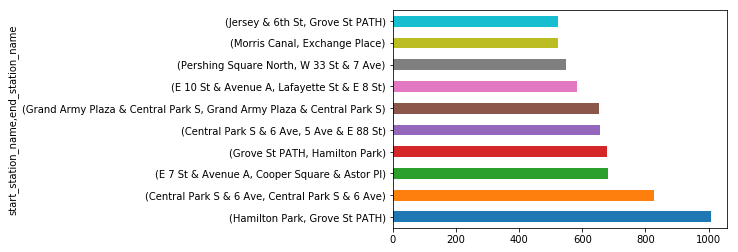

In [76]:
cb_trips.head(10).plot.barh()

# Mapping Stations Based on Popularity

In [81]:
#use the number of trips to measure popularity
start_dict = start_station_popularity.to_dict()
start_dict

{'number of trips starting': {'1 Ave & E 110 St': 1324,
  '1 Ave & E 16 St': 7675,
  '1 Ave & E 18 St': 5152,
  '1 Ave & E 30 St': 4450,
  '1 Ave & E 44 St': 3026,
  '1 Ave & E 62 St': 4046,
  '1 Ave & E 68 St': 6642,
  '1 Ave & E 78 St': 4230,
  '1 Ave & E 94 St': 1664,
  '1 Pl & Clinton St': 852,
  '10 Hudson Yards': 558,
  '10 St & 5 Ave': 663,
  '10 St & 7 Ave': 912,
  '11 Ave & W 27 St': 6018,
  '11 Ave & W 41 St': 4731,
  '11 Ave & W 59 St': 5223,
  '11 St & 35 Ave': 109,
  '11 St & 43 Ave': 170,
  '12 Ave & W 40 St': 9043,
  '12 St & 4 Ave': 484,
  '14 St & 5 Ave': 1208,
  '14 St & 7 Ave': 929,
  '19 St & 24 Ave': 462,
  '2 Ave & 36 St - Citi Bike HQ at Industry City': 842,
  '2 Ave & 9 St': 456,
  '2 Ave & E 104 St': 1209,
  '2 Ave & E 122 St': 509,
  '2 Ave & E 31 St': 4989,
  '2 Ave & E 55 St': 3093,
  '2 Ave & E 96 St': 2678,
  '2 Ave & E 99 St': 760,
  '21 St & 31 Dr': 627,
  '21 St & 36 Ave': 144,
  '21 St & 38 Ave': 160,
  '21 St & 43 Ave': 283,
  '21 St & Hoyt Ave S': 24

In [82]:
stations = start_station_popularity.index.tolist()
stations

['1 Ave & E 110 St',
 '1 Ave & E 16 St',
 '1 Ave & E 18 St',
 '1 Ave & E 30 St',
 '1 Ave & E 44 St',
 '1 Ave & E 62 St',
 '1 Ave & E 68 St',
 '1 Ave & E 78 St',
 '1 Ave & E 94 St',
 '1 Pl & Clinton St',
 '10 Hudson Yards',
 '10 St & 5 Ave',
 '10 St & 7 Ave',
 '11 Ave & W 27 St',
 '11 Ave & W 41 St',
 '11 Ave & W 59 St',
 '11 St & 35 Ave',
 '11 St & 43 Ave',
 '12 Ave & W 40 St',
 '12 St & 4 Ave',
 '14 St & 5 Ave',
 '14 St & 7 Ave',
 '19 St & 24 Ave',
 '2 Ave & 36 St - Citi Bike HQ at Industry City',
 '2 Ave & 9 St',
 '2 Ave & E 104 St',
 '2 Ave & E 122 St',
 '2 Ave & E 31 St',
 '2 Ave & E 55 St',
 '2 Ave & E 96 St',
 '2 Ave & E 99 St',
 '21 St & 31 Dr',
 '21 St & 36 Ave',
 '21 St & 38 Ave',
 '21 St & 43 Ave',
 '21 St & Hoyt Ave S',
 '21 St & Queens Plaza North',
 '23 Ave & 27 St',
 '24 Ave & 26 St',
 '24 Ave & 29 St',
 '24 St & 41 Ave',
 '27 Ave & 4 St',
 '27 Ave & 9 St',
 '27 St & Hunter St',
 '28 Ave & 35 St',
 '28 Ave & 44 St',
 '28 St & 36 Ave',
 '28 St & 38 Ave',
 '28 St & 40 Ave',

In [83]:
popularity_directory = {}
for station in stations:
    trips = start_dict['number of trips starting'][station]
    popularity_directory.update({station: trips})
popularity_directory

{'1 Ave & E 110 St': 1324,
 '1 Ave & E 16 St': 7675,
 '1 Ave & E 18 St': 5152,
 '1 Ave & E 30 St': 4450,
 '1 Ave & E 44 St': 3026,
 '1 Ave & E 62 St': 4046,
 '1 Ave & E 68 St': 6642,
 '1 Ave & E 78 St': 4230,
 '1 Ave & E 94 St': 1664,
 '1 Pl & Clinton St': 852,
 '10 Hudson Yards': 558,
 '10 St & 5 Ave': 663,
 '10 St & 7 Ave': 912,
 '11 Ave & W 27 St': 6018,
 '11 Ave & W 41 St': 4731,
 '11 Ave & W 59 St': 5223,
 '11 St & 35 Ave': 109,
 '11 St & 43 Ave': 170,
 '12 Ave & W 40 St': 9043,
 '12 St & 4 Ave': 484,
 '14 St & 5 Ave': 1208,
 '14 St & 7 Ave': 929,
 '19 St & 24 Ave': 462,
 '2 Ave & 36 St - Citi Bike HQ at Industry City': 842,
 '2 Ave & 9 St': 456,
 '2 Ave & E 104 St': 1209,
 '2 Ave & E 122 St': 509,
 '2 Ave & E 31 St': 4989,
 '2 Ave & E 55 St': 3093,
 '2 Ave & E 96 St': 2678,
 '2 Ave & E 99 St': 760,
 '21 St & 31 Dr': 627,
 '21 St & 36 Ave': 144,
 '21 St & 38 Ave': 160,
 '21 St & 43 Ave': 283,
 '21 St & Hoyt Ave S': 246,
 '21 St & Queens Plaza North': 792,
 '23 Ave & 27 St': 248,
 

In [80]:
heatmap = folium.Map(
    location= [40.730207,-73.991026],
    zoom_start=12,
    tiles='Stamen Terrain')

heatmap

In [84]:
#mapping stations based on their popularity
#set opacity to be a function of popularity
for station in popularity_directory:
    location = directory[station]
    num = popularity_directory[station]
    folium.CircleMarker(location, color = 'green', radius=0.01, opacity=num/8000).add_to(heatmap)
heatmap

# Bike Use Rate

In [85]:
# Cleaning the data: dropping all the trips that's longer than 2 hours?
cb[['tripduration']].describe()

tripduration
count  1.917571e+06
mean   8.935684e+02
std    8.438844e+03
min    6.100000e+01
25%    3.520000e+02
50%    5.920000e+02
75%    1.027000e+03
max    2.500911e+06

In [89]:
cb = cb.loc[cb['tripduration'] <= 7200]

In [90]:
cb

tripduration               starttime                stoptime  \
0               330 2018-10-01 00:00:00.701 2018-10-01 00:05:30.849   
1               309 2018-10-01 00:00:13.578 2018-10-01 00:05:23.231   
2               734 2018-10-01 00:00:16.604 2018-10-01 00:12:31.505   
3               788 2018-10-01 00:00:35.067 2018-10-01 00:13:43.578   
4              1136 2018-10-01 00:00:38.141 2018-10-01 00:19:34.649   
5               623 2018-10-01 00:00:39.077 2018-10-01 00:11:02.791   
6               498 2018-10-01 00:00:45.635 2018-10-01 00:09:04.405   
7               103 2018-10-01 00:00:49.174 2018-10-01 00:02:32.541   
8               484 2018-10-01 00:00:55.996 2018-10-01 00:09:00.512   
9               252 2018-10-01 00:01:01.855 2018-10-01 00:05:14.620   
10              583 2018-10-01 00:01:03.026 2018-10-01 00:10:46.146   
11             1099 2018-10-01 00:01:06.894 2018-10-01 00:19:26.723   
12              389 2018-10-01 00:01:10.078 2018-10-01 00:07:39.872   
13              164 2018-10-01 00:01:09.291 2018-10-01 00:03:54.217   
14              405 2018-10-01 00:01:09.102 2018-10-01 00:07:55.012   
15              423 2018-10-01 00:01:17.388 2018-10-01 00:08:20.644   
16              511 2018-10-01 00:01:29.346 2018-10-01 00:10:00.528   
17              660 2018-10-01 00:01:31.864 2018-10-01 00:12:32.633   
18              235 2018-10-01 00:01:49.967 2018-10-01 00:05:45.725   
19             1312 2018-10-01 00:01:53.826 2018-10-01 00:23:46.498   
20             1497 2018-10-01 00:01:58.594 2018-10-01 00:26:55.913   
21             1457 2018-10-01 00:01:11.420 2018-10-01 00:25:28.967   
22             1193 2018-10-01 00:02:07.968 2018-10-01 00:22:01.110   
23             1002 2018-10-01 00:02:08.772 2018-10-01 00:18:51.100   
24              192 2018-10-01 00:02:33.183 2018-10-01 00:05:45.233   
25              887 2018-10-01 00:02:38.024 2018-10-01 00:17:25.545   
26              326 2018-10-01 00:02:47.980 2018-10-01 00:08:14.141   
27              460 2018-10-01 00:03:10.070 2018-10-01 00:10:51.001   
28             1374 2018-10-01 00:03:13.873 2018-10-01 00:26:07.986   
29              148 2018-10-01 00:03:16.226 2018-10-01 00:05:44.771   
...             ...                     ...                     ...   
39108           440 2018-10-21 14:00:53.097 2018-10-21 14:08:13.550   
39109           980 2018-10-22 06:33:27.252 2018-10-22 06:49:48.208   
39110          1511 2018-10-22 17:27:41.372 2018-10-22 17:52:52.829   
39111          1015 2018-10-23 06:19:28.562 2018-10-23 06:36:24.531   
39112           680 2018-10-23 09:35:42.158 2018-10-23 09:47:02.327   
39113          1045 2018-10-23 10:26:24.831 2018-10-23 10:43:50.236   
39114           999 2018-10-23 10:57:37.074 2018-10-23 11:14:16.872   
39115           426 2018-10-23 16:36:36.893 2018-10-23 16:43:43.862   
39116          1048 2018-10-24 06:22:26.072 2018-10-24 06:39:54.861   
39117          1038 2018-10-25 06:22:36.944 2018-10-25 06:39:55.359   
39118           341 2018-10-25 10:34:02.664 2018-10-25 10:39:44.280   
39119          1445 2018-10-25 11:00:35.044 2018-10-25 11:24:40.498   
39120          1449 2018-10-25 11:00:45.059 2018-10-25 11:24:54.584   
39121          1317 2018-10-25 11:02:53.809 2018-10-25 11:24:51.070   
39122           382 2018-10-25 16:40:04.902 2018-10-25 16:46:27.507   
39123          1016 2018-10-26 06:25:31.699 2018-10-26 06:42:27.854   
39124          1692 2018-10-28 12:55:22.962 2018-10-28 13:23:35.470   
39125          1007 2018-10-29 06:25:55.740 2018-10-29 06:42:43.237   
39126           637 2018-10-29 09:19:16.258 2018-10-29 09:29:53.689   
39127           715 2018-10-29 11:17:36.026 2018-10-29 11:29:31.045   
39128           481 2018-10-29 16:32:41.525 2018-10-29 16:40:43.073   
39129           379 2018-10-29 18:07:37.481 2018-10-29 18:13:56.703   
39130          1006 2018-10-30 06:28:48.607 2018-10-30 06:45:35.395   
39131          1119 2018-10-30 10:35:45.564 2018-10-30 10:54:25.301   
39132           378 2018-10-30 

In [91]:
# Rank bikes based on number of times used
cb_bike_use = cb.groupby('bikeid').size().reset_index(name = 'number of times used')

In [92]:
cb_bike_use = cb_bike_use.sort_values('number of times used', ascending = False)

In [93]:
cb_bike_use.head(10)

bikeid  number of times used
10752   34695                   655
10882   34869                   598
10765   34710                   592
10781   34730                   566
10766   34712                   561
10210   33892                   544
10102   33780                   531
10740   34682                   530
10414   34105                   512
10142   33821                   511

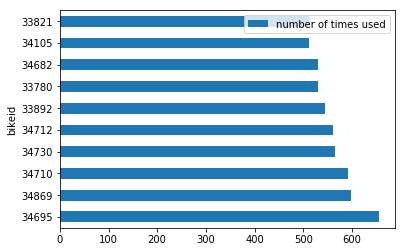

In [94]:
cb_bike_use.set_index('bikeid').head(10).plot(kind='barh')

In [95]:
# Rank bikes based on minutes traveled
cb_bike_use_minute = cb.groupby('bikeid')['tripduration'].sum() / 3600

In [96]:
cb_bike_use_minute = cb_bike_use_minute.to_frame()

In [97]:
cb_bike_use_minute = cb_bike_use_minute.sort_values('tripduration', ascending = False)

In [98]:
cb_bike_use_minute.head(10)

tripduration
bikeid              
34695     164.894722
34710     162.945833
34712     150.577778
34869     146.935556
34682     138.882500
34724     135.663333
34751     135.543889
34709     135.065833
34730     134.436944
33892     129.764722

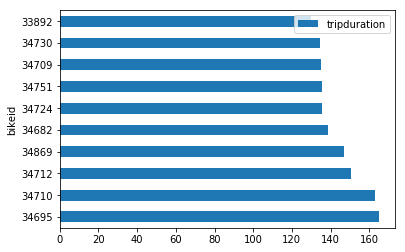

In [99]:
cb_bike_use_minute.head(10).plot(kind='barh')

In [100]:
#number of bikes used in October
cb['bikeid'].nunique()

11367

In [101]:
bikes = cb.groupby('bikeid')['starttime'].count().sort_values(ascending = False).to_frame()

In [102]:
# if a bike is used less than 31 times, we deem it 'not being efficiently used'
bikes.loc[bikes['starttime'] <= 31].shape[0]

966

In [103]:
# the percentage of bikes being efficiently used
1 - 966/11368

0.9150246305418719

# Distance traveled and Speed

In [113]:
import geopy.distance

In [123]:
cb_age

tripduration               starttime                stoptime  \
0               330 2018-10-01 00:00:00.701 2018-10-01 00:05:30.849   
1               309 2018-10-01 00:00:13.578 2018-10-01 00:05:23.231   
2               734 2018-10-01 00:00:16.604 2018-10-01 00:12:31.505   
3               788 2018-10-01 00:00:35.067 2018-10-01 00:13:43.578   
4              1136 2018-10-01 00:00:38.141 2018-10-01 00:19:34.649   
5               623 2018-10-01 00:00:39.077 2018-10-01 00:11:02.791   
6               498 2018-10-01 00:00:45.635 2018-10-01 00:09:04.405   
7               103 2018-10-01 00:00:49.174 2018-10-01 00:02:32.541   
8               484 2018-10-01 00:00:55.996 2018-10-01 00:09:00.512   
9               252 2018-10-01 00:01:01.855 2018-10-01 00:05:14.620   
10              583 2018-10-01 00:01:03.026 2018-10-01 00:10:46.146   
11             1099 2018-10-01 00:01:06.894 2018-10-01 00:19:26.723   
12              389 2018-10-01 00:01:10.078 2018-10-01 00:07:39.872   
13              164 2018-10-01 00:01:09.291 2018-10-01 00:03:54.217   
14              405 2018-10-01 00:01:09.102 2018-10-01 00:07:55.012   
15              423 2018-10-01 00:01:17.388 2018-10-01 00:08:20.644   
16              511 2018-10-01 00:01:29.346 2018-10-01 00:10:00.528   
17              660 2018-10-01 00:01:31.864 2018-10-01 00:12:32.633   
18              235 2018-10-01 00:01:49.967 2018-10-01 00:05:45.725   
19             1312 2018-10-01 00:01:53.826 2018-10-01 00:23:46.498   
20             1497 2018-10-01 00:01:58.594 2018-10-01 00:26:55.913   
21             1457 2018-10-01 00:01:11.420 2018-10-01 00:25:28.967   
22             1193 2018-10-01 00:02:07.968 2018-10-01 00:22:01.110   
23             1002 2018-10-01 00:02:08.772 2018-10-01 00:18:51.100   
24              192 2018-10-01 00:02:33.183 2018-10-01 00:05:45.233   
25              887 2018-10-01 00:02:38.024 2018-10-01 00:17:25.545   
26              326 2018-10-01 00:02:47.980 2018-10-01 00:08:14.141   
27              460 2018-10-01 00:03:10.070 2018-10-01 00:10:51.001   
28             1374 2018-10-01 00:03:13.873 2018-10-01 00:26:07.986   
29              148 2018-10-01 00:03:16.226 2018-10-01 00:05:44.771   
...             ...                     ...                     ...   
39107           689 2018-10-20 21:17:08.921 2018-10-20 21:28:37.976   
39108           440 2018-10-21 14:00:53.097 2018-10-21 14:08:13.550   
39109           980 2018-10-22 06:33:27.252 2018-10-22 06:49:48.208   
39110          1511 2018-10-22 17:27:41.372 2018-10-22 17:52:52.829   
39111          1015 2018-10-23 06:19:28.562 2018-10-23 06:36:24.531   
39112           680 2018-10-23 09:35:42.158 2018-10-23 09:47:02.327   
39113          1045 2018-10-23 10:26:24.831 2018-10-23 10:43:50.236   
39114           999 2018-10-23 10:57:37.074 2018-10-23 11:14:16.872   
39115           426 2018-10-23 16:36:36.893 2018-10-23 16:43:43.862   
39116          1048 2018-10-24 06:22:26.072 2018-10-24 06:39:54.861   
39117          1038 2018-10-25 06:22:36.944 2018-10-25 06:39:55.359   
39118           341 2018-10-25 10:34:02.664 2018-10-25 10:39:44.280   
39119          1445 2018-10-25 11:00:35.044 2018-10-25 11:24:40.498   
39120          1449 2018-10-25 11:00:45.059 2018-10-25 11:24:54.584   
39122           382 2018-10-25 16:40:04.902 2018-10-25 16:46:27.507   
39123          1016 2018-10-26 06:25:31.699 2018-10-26 06:42:27.854   
39124          1692 2018-10-28 12:55:22.962 2018-10-28 13:23:35.470   
39125          1007 2018-10-29 06:25:55.740 2018-10-29 06:42:43.237   
39126           637 2018-10-29 09:19:16.258 2018-10-29 09:29:53.689   
39127           715 2018-10-29 11:17:36.026 2018-10-29 11:29:31.045   
39128           481 2018-10-29 16:32:41.525 2018-10-29 16:40:43.073   
39129           379 2018-10-29 18:07:37.481 2018-10-29 18:13:56.703   
39130          1006 2018-10-30 06:28:48.607 2018-10-30 06:45:35.395   
39131          1119 2018-10-30 10:35:45.564 2018-10-30 10:54:25.301   
39132           378 2018-10-30 

In [124]:
cb_distance = cb_age[['tripduration', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'usertype', 'gender', 'age']]

In [125]:
cb_distance

tripduration  start_station_latitude  start_station_longitude  \
0               330               40.730207               -73.991026   
1               309               40.729554               -73.980572   
2               734               40.742754               -74.007474   
3               788               40.712912               -74.010202   
4              1136               40.763605               -73.989180   
5               623               40.719009               -73.958525   
6               498               40.711174               -73.996826   
7               103               40.785920               -73.948603   
8               484               40.711174               -73.996826   
9               252               40.774667               -73.984706   
10              583               40.718939               -73.992663   
11             1099               40.677165               -73.973828   
12              389               40.742754               -74.007474   
13              164               40.804555               -73.939686   
14              405               40.800836               -73.966449   
15              423               40.715348               -73.960241   
16              511               40.750200               -73.990931   
17              660               40.742754               -74.007474   
18              235               40.708318               -74.005041   
19             1312               40.774925               -73.982666   
20             1497               40.710369               -73.947060   
21             1457               40.766368               -73.971518   
22             1193               40.763707               -73.985162   
23             1002               40.677165               -73.973828   
24              192               40.728846               -74.008591   
25              887               40.751551               -73.993934   
26              326               40.797470               -73.935040   
27              460               40.751551               -73.993934   
28             1374               40.774925               -73.982666   
29              148               40.711512               -74.015756   
...             ...                     ...                      ...   
39107           689               40.711130               -74.078900   
39108           440               40.711130               -74.078900   
39109           980               40.711130               -74.078900   
39110          1511               40.711130               -74.078900   
39111          1015               40.711130               -74.078900   
39112           680               40.711130               -74.078900   
39113          1045               40.711130               -74.078900   
39114           999               40.711130               -74.078900   
39115           426               40.711130               -74.078900   
39116          1048               40.711130               -74.078900   
39117          1038               40.711130               -74.078900   
39118           341               40.711130               -74.078900   
39119          1445               40.711130               -74.078900   
39120          1449               40.711130               -74.078900   
39122           382               40.711130               -74.078900   
39123          1016               40.711130               -74.078900   
39124          1692               40.711130               -74.078900   
39125          1007               40.711130               -74.078900   
39126           637               40.711130               -74.078900   
39127           715               40.711130               -74.078900   
39128           481               40.711130               -74.078900   
39129           379               40.711130               -74.078900   
39130          1006               40.711130               -74.078900   
39131          1119               40.711130    

In [117]:
def distance_calculator(a,b,c,d):
    return geopy.distance.vincenty((a, b),(c, d)).miles

In [126]:
cb_distance['distance'] = cb_distance[['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']].apply(lambda x: distance_calculator(*x), axis=1)

/Users/yanzhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [127]:
cb_distance['speed'] = 3600*cb_distance['distance'] / cb_distance['tripduration']

/Users/yanzhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [128]:
cb_distance

tripduration  start_station_latitude  start_station_longitude  \
0               330               40.730207               -73.991026   
1               309               40.729554               -73.980572   
2               734               40.742754               -74.007474   
3               788               40.712912               -74.010202   
4              1136               40.763605               -73.989180   
5               623               40.719009               -73.958525   
6               498               40.711174               -73.996826   
7               103               40.785920               -73.948603   
8               484               40.711174               -73.996826   
9               252               40.774667               -73.984706   
10              583               40.718939               -73.992663   
11             1099               40.677165               -73.973828   
12              389               40.742754               -74.007474   
13              164               40.804555               -73.939686   
14              405               40.800836               -73.966449   
15              423               40.715348               -73.960241   
16              511               40.750200               -73.990931   
17              660               40.742754               -74.007474   
18              235               40.708318               -74.005041   
19             1312               40.774925               -73.982666   
20             1497               40.710369               -73.947060   
21             1457               40.766368               -73.971518   
22             1193               40.763707               -73.985162   
23             1002               40.677165               -73.973828   
24              192               40.728846               -74.008591   
25              887               40.751551               -73.993934   
26              326               40.797470               -73.935040   
27              460               40.751551               -73.993934   
28             1374               40.774925               -73.982666   
29              148               40.711512               -74.015756   
...             ...                     ...                      ...   
39107           689               40.711130               -74.078900   
39108           440               40.711130               -74.078900   
39109           980               40.711130               -74.078900   
39110          1511               40.711130               -74.078900   
39111          1015               40.711130               -74.078900   
39112           680               40.711130               -74.078900   
39113          1045               40.711130               -74.078900   
39114           999               40.711130               -74.078900   
39115           426               40.711130               -74.078900   
39116          1048               40.711130               -74.078900   
39117          1038               40.711130               -74.078900   
39118           341               40.711130               -74.078900   
39119          1445               40.711130               -74.078900   
39120          1449               40.711130               -74.078900   
39122           382               40.711130               -74.078900   
39123          1016               40.711130               -74.078900   
39124          1692               40.711130               -74.078900   
39125          1007               40.711130               -74.078900   
39126           637               40.711130               -74.078900   
39127           715               40.711130               -74.078900   
39128           481               40.711130               -74.078900   
39129           379               40.711130               -74.078900   
39130          1006               40.711130               -74.078900   
39131          1119               40.711130    

### Regression, Demographics Analysis on Speed

In [129]:
cb_distance[['age']].describe()

age
count  1.861796e+06
mean   3.736452e+01
std    1.082262e+01
min    1.600000e+01
25%    2.800000e+01
50%    3.500000e+01
75%    4.700000e+01
max    6.200000e+01

In [130]:
cb_distance[['speed']].describe()

speed
count  1.861796e+06
mean   5.565922e+00
std    2.009314e+00
min    0.000000e+00
25%    4.494971e+00
50%    5.678092e+00
75%    6.832265e+00
max    3.428845e+01

In [131]:
#data cleaning
speed_upper_limit = cb_distance[['speed']].mean() + 2*cb_distance[['speed']].std()

In [132]:
speed_upper_limit

speed    9.58455
dtype: float64

In [133]:
cb_speed = cb_distance[['age', 'gender','speed', 'distance', 'usertype']]

In [134]:
cb_speed = cb_speed.loc[cb_speed['speed'] > 0]

In [135]:
cb_speed = cb_speed.loc[cb_speed['speed'] <= 9.58]

In [136]:
cb_speed[['speed']].describe()

speed
count  1.794420e+06
mean   5.580249e+00
std    1.777306e+00
min    5.808986e-04
25%    4.549549e+00
50%    5.678224e+00
75%    6.782845e+00
max    9.579965e+00

In [137]:
cb_speed

age  gender     speed  distance    usertype
0       23       1  5.575570  0.511094  Subscriber
1       51       1  3.910095  0.335616  Subscriber
2       35       2  5.125302  1.044992  Subscriber
3       30       1  9.429983  2.064118    Customer
4       49       0  0.667312  0.210574  Subscriber
5       35       1  5.443456  0.942020    Customer
6       26       2  3.772597  0.521876  Subscriber
7       35       1  4.972389  0.142266  Subscriber
8       23       1  3.881722  0.521876  Subscriber
9       45       1  4.891983  0.342439  Subscriber
10      49       1  3.691962  0.597893  Subscriber
11      29       2  3.330753  1.016805    Customer
12      40       2  6.285010  0.679130  Subscriber
13      22       1  8.663538  0.394672  Subscriber
14      34       1  6.363719  0.715918  Subscriber
15      27       1  9.301069  1.092876  Subscriber
16      40       1  5.718694  0.811737  Subscriber
17      39       1  5.699957  1.044992  Subscriber
18      36       1  2.751965  0.179642  Subscriber
19      37       1  8.676304  3.162031  Subscriber
20      41       1  0.558520  0.232251  Subscriber
21      43       1  2.476430  1.002266  Subscriber
22      35       2  7.478948  2.478440  Subscriber
23      24       1  3.653191  1.016805  Subscriber
24      27       1  5.973836  0.318605  Subscriber
25      62       2  4.402813  1.084804  Subscriber
26      23       1  7.469224  0.676380    Customer
27      28       0  6.300443  0.805057  Subscriber
28      39       1  9.088246  3.468680  Subscriber
29      26       2  5.596415  0.230075  Subscriber
...    ...     ...       ...       ...         ...
39107   28       1  8.197100  1.568834  Subscriber
39108   28       1  9.371663  1.145425  Subscriber
39109   41       1  8.859904  2.411863  Subscriber
39110   29       1  6.988020  2.933027  Subscriber
39111   41       1  8.554390  2.411863  Subscriber
39112   49       0  9.072432  1.713682    Customer
39113   24       2  5.404595  1.568834  Subscriber
39114   27       2  6.832725  1.896081  Subscriber
39115   27       1  5.768578  0.682615  Subscriber
39116   41       1  8.285024  2.411863  Subscriber
39117   41       1  8.364842  2.411863  Subscriber
39118   24       2  5.788912  0.548339  Subscriber
39119   18       2  3.939054  1.581092    Customer
39120   50       2  3.928180  1.581092    Customer
39122   27       1  6.433022  0.682615  Subscriber
39123   41       1  8.545970  2.411863  Subscriber
39124   31       1  5.568513  2.617201  Subscriber
39125   41       1  8.622349  2.411863  Subscriber
39126   28       1  6.473362  1.145425  Subscriber
39127   33       1  7.899024  1.568834  Subscriber
39128   27       1  6.418091  0.857528  Subscriber
39129   62       1  6.562021  0.690835  Subscriber
39130   41       1  8.630920  2.411863  Subscriber
39131   24       2  5.723900  1.779179  Subscriber
39132   62       1  6.579381  0.690835  Subscriber
39133   27       1  6.105449  1.896081  Subscriber
39134   32       1  5.495887  1.896081    Customer
39135   41       1  5.745700  1.896081    Customer
39136   30       1  2.499913  0.682615  Subscriber
39137   27       2  5.674819  0.857528  Subscriber

[1794420 rows x 5 columns]

In [139]:
#use the subscriber data, because there is a tendency among customers to choose default setting
cb_speed = cb_speed.loc[cb_speed['usertype'] == 'Subscriber']

In [140]:
cb_speed = cb_speed.loc[cb_speed['gender'] != 0]

In [141]:
cb_speed.groupby('gender').mean()

age     speed  distance
gender                               
1       37.168379  5.897307  1.071701
2       36.242352  5.424969  1.130872

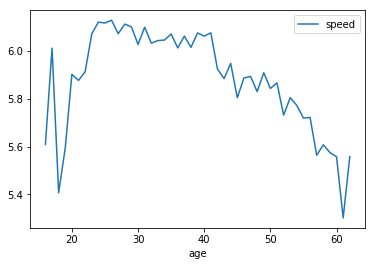

In [142]:
# Male speed and age
cb_speed.loc[cb_speed.gender == 1].groupby('age').median()['speed'].to_frame().plot()

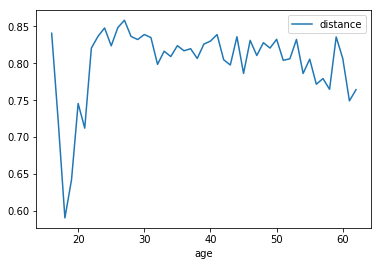

In [143]:
# male distance and age
cb_speed.loc[cb_speed.gender == 1].groupby('age').median()['distance'].to_frame().plot()

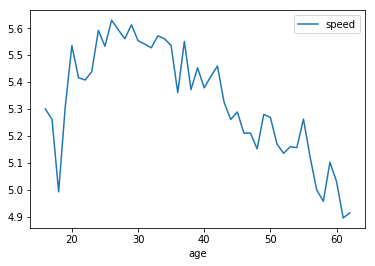

In [144]:
# Female speed and age
cb_speed.loc[cb_speed.gender == 2].groupby('age').median()['speed'].to_frame().plot()

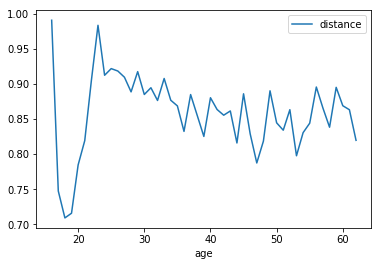

In [145]:
# Female distance and age
cb_speed.loc[cb_speed.gender == 2].groupby('age').median()['distance'].to_frame().plot()

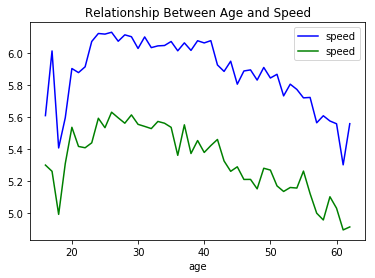

In [146]:
fig, ax = plt.subplots()
cb_speed.loc[cb_speed.gender == 1].groupby('age').median()['speed'].to_frame().plot(
        ax=ax,
        kind='line',               
        color=['blue'],  
        title='Relationship Between Age and Speed')

cb_speed.loc[cb_speed.gender == 2].groupby('age').median()['speed'].to_frame().plot(
        ax=ax,
        kind='line',               
        color=['green'])

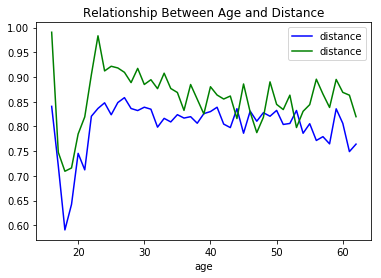

In [147]:
fig, ax = plt.subplots()
cb_speed.loc[cb_speed.gender == 1].groupby('age').median()['distance'].to_frame().plot(
        ax=ax,
        kind='line',               
        color=['blue'],  
        title='Relationship Between Age and Distance')

cb_speed.loc[cb_speed.gender == 2].groupby('age').median()['distance'].to_frame().plot(
        ax=ax,
        kind='line',               
        color=['green'])

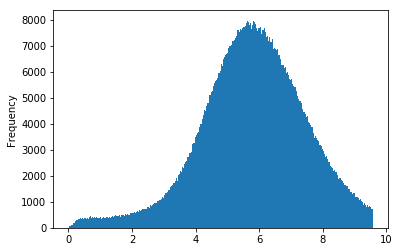

In [148]:
cb_speed['speed'].plot.hist(bins = 500)

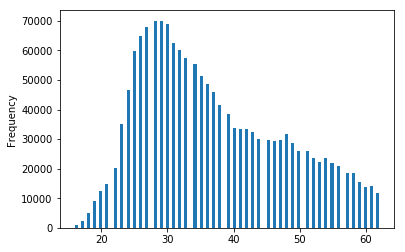

In [149]:
cb_speed['age'].plot.hist(bins=100)

In [150]:
print(smf.ols('speed ~ gender + age', data = cb_speed).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  speed   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                 1.671e+04
Date:                Tue, 18 Dec 2018   Prob (F-statistic):               0.00
Time:                        13:25:56   Log-Likelihood:            -3.0193e+06
No. Observations:             1579336   AIC:                         6.039e+06
Df Residuals:                 1579333   BIC:                         6.039e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7955      0.006   1115.788      0.0

In [151]:
print(smf.ols('speed ~ gender', data = cb_speed).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  speed   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                 2.478e+04
Date:                Tue, 18 Dec 2018   Prob (F-statistic):               0.00
Time:                        13:25:59   Log-Likelihood:            -3.0236e+06
No. Observations:             1579336   AIC:                         6.047e+06
Df Residuals:                 1579334   BIC:                         6.047e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3696      0.004   1599.277      0.0

In [152]:
print(smf.ols('speed ~ age', data = cb_speed).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  speed   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     7321.
Date:                Tue, 18 Dec 2018   Prob (F-statistic):               0.00
Time:                        13:26:11   Log-Likelihood:            -3.0322e+06
No. Observations:             1579336   AIC:                         6.064e+06
Df Residuals:                 1579334   BIC:                         6.064e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1632      0.005   1312.211      0.0